In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/crossmatch_5_arcsec.csv")

In [3]:
df.loc[df.TIC.isin([237880881, 44984200, 277539431]), ["Tmag", "TIC", "g_rp"]]

,Tmag,TIC,g_rp
19617,13.474,237880881,1.369149
34569,12.583,44984200,1.540246
36370,13.001,277539431,1.513121


In [4]:
df.TIC.drop_duplicates()

0        1865144170
1        1865144169
2         214227436
3         156213379
4        1174277267
            ...    
62331    1853251618
62332    1853251597
62333    1853251619
62334    1853251617
62335     930750616
Name: TIC, Length: 62013, dtype: int64

In [5]:
df.TIC.shape

(62336,)

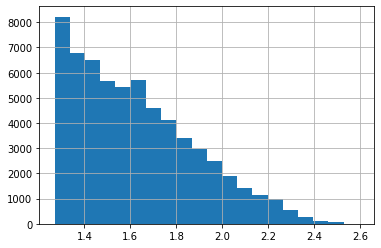

In [6]:
df.g_rp.hist(bins=20)

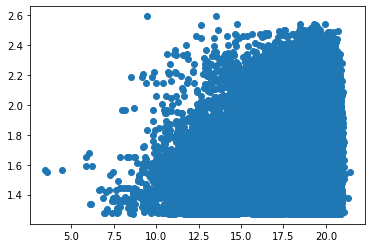

In [7]:
plt.scatter(df.Tmag, df.g_rp)

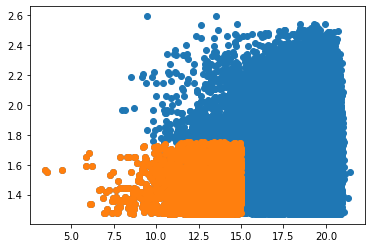

In [31]:
df2 = df[(df.Tmag<15) & (df.g_rp<1.75)]
plt.scatter(df.Tmag, df.g_rp)
plt.scatter(df2.Tmag, df2.g_rp)

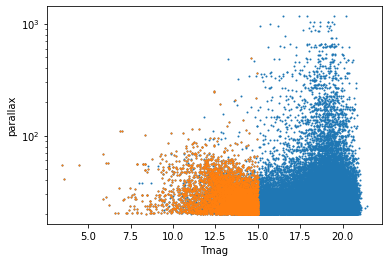

In [32]:
plt.scatter(df.Tmag, df.parallax, s=1)
plt.scatter(df2.Tmag, df2.parallax, s=1)
plt.xlabel("Tmag")
plt.ylabel("parallax")
plt.yscale("log")


In [40]:
df3[df3.TIC==50745567].designation

3499    Gaia DR2 3216729878197029120
Name: designation, dtype: object

In [33]:
p1 = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/pineda/Final2Min_C1.csv")
p2 = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/pineda/Final2Min_C2.csv")

In [34]:
p = pd.concat([p1,p2])
p1.shape + p2.shape, p.shape, p.columns

((120, 10, 167, 10),
 (287, 10),
 Index(['TIC ID', 'RA', 'DEC', 'pmRA', 'pmDEC', 'TESS mag', 'Name', 'Extended',
        'Handling', 'Obj. Type'],
       dtype='object'))

In [35]:
df3 = df2.merge(p,  how="left", left_on="TIC", right_on="TIC ID")
df2.shape, df3.shape

((7942, 56), (7942, 66))

In [14]:
dfleft = df3[df3["Obj. Type"].isnull()]

In [15]:
from lightkurve import search_lightcurvefile
res = pd.DataFrame(columns=["sector", "TIC"])

In [16]:
for i, row in df3.iterrows():
    TIC = row.TIC
    try:
        lst = search_lightcurvefile(f"TIC {TIC}", cadence="short")
        _ = {"sector":lst.table.to_pandas()["observation"].str[12:].values,
         "TIC":TIC}
        r = pd.DataFrame(_)
        with open("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/gotlc.csv", "a") as f:
            r.to_csv(f,header=False, index=False)
        print(i)
    except:
        with open("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/nolc.txt", "a") as f:
            f.write(f"TIC {TIC}\n")


0


No data found for target "TIC 75936931".


2


No data found for target "TIC 99618728".
No data found for target "TIC 435883879".


5
6


No data found for target "TIC 28869821".


8
9
10


No data found for target "TIC 82457898".


12
13
14


No data found for target "TIC 330532478".
No data found for target "TIC 377168531".
No data found for target "TIC 366133205".
No data found for target "TIC 58719651".


20
21
22


No data found for target "TIC 368895397".


24


No data found for target "TIC 302033722".


26
27
28
29
30
31
32


No data found for target "TIC 20927326".
No data found for target "TIC 132944504".
No data found for target "TIC 265361131".


36


No data found for target "TIC 434113290".
No data found for target "TIC 1935155880".
No data found for target "TIC 376220244".


40


No data found for target "TIC 287609738".


42
43
44
45
46
47
48
49


No data found for target "TIC 102080213".


51
52
53
54
55


No data found for target "TIC 243767158".


57


No data found for target "TIC 422060017".
No data found for target "TIC 152894212".


60


No data found for target "TIC 148412892".
No data found for target "TIC 9756596".


63
64


No data found for target "TIC 152979814".
No data found for target "TIC 9165639".


67
68


No data found for target "TIC 52170642".
No data found for target "TIC 322052999".


71


No data found for target "TIC 169765764".


73


No data found for target "TIC 410993480".
No data found for target "TIC 47139200".


76


No data found for target "TIC 246682155".
No data found for target "TIC 193438280".
No data found for target "TIC 1203340504".
No data found for target "TIC 193438282".


81
82
83
84
85
86
87


No data found for target "TIC 80431616".


89
90


No data found for target "TIC 344069890".
No data found for target "TIC 164995228".


94
95
96


No data found for target "TIC 16371909".
No data found for target "TIC 157579274".
No data found for target "TIC 462587645".
No data found for target "TIC 256935677".
No data found for target "TIC 232369049".


102
103
104


No data found for target "TIC 85992881".
No data found for target "TIC 417944799".


107
108
109
110


No data found for target "TIC 462257213".
No data found for target "TIC 102887224".


113
114


No data found for target "TIC 306485634".
No data found for target "TIC 219749502".


117
118
119
120
121
125


No data found for target "TIC 351470586".
No data found for target "TIC 446339621".


128
129
130
131


No data found for target "TIC 129642035".


133


No data found for target "TIC 625136000".
No data found for target "TIC 256612537".


137


No data found for target "TIC 247964351".
No data found for target "TIC 456813125".


140
141
142


No data found for target "TIC 31744914".
No data found for target "TIC 238276265".


145
146
147


No data found for target "TIC 84332044".
No data found for target "TIC 421192479".


150
151


No data found for target "TIC 66084462".


153


No data found for target "TIC 175373615".
No data found for target "TIC 172841961".
No data found for target "TIC 419936422".
No data found for target "TIC 408165901".


158
159
160


No data found for target "TIC 266442153".
No data found for target "TIC 459660764".
No data found for target "TIC 459660765".


164
165
166
167
168
169
170


No data found for target "TIC 423570423".
No data found for target "TIC 168679379".


173
174
175
176
177


No data found for target "TIC 369082521".


180


No data found for target "TIC 443720792".


182
183


No data found for target "TIC 456801531".
No data found for target "TIC 47095952".
No data found for target "TIC 49931323".
No data found for target "TIC 23749998".


188


No data found for target "TIC 409922538".


190
191


No data found for target "TIC 10638690".


193
194


No data found for target "TIC 418186323".


196
197
198
199


No data found for target "TIC 373406221".
No data found for target "TIC 419851434".
No data found for target "TIC 350788420".


204


No data found for target "TIC 456620922".
No data found for target "TIC 364886011".


207


No data found for target "TIC 26589906".
No data found for target "TIC 8793819".
No data found for target "TIC 5776728".


211
212
213
214
215
216


No data found for target "TIC 114999875".


218
219
220
221
222


No data found for target "TIC 61601443".


224
225
226
227
228


No data found for target "TIC 169286174".


230


No data found for target "TIC 212380679".
No data found for target "TIC 66690939".


233
234


No data found for target "TIC 381236969".
No data found for target "TIC 141278252".


237


No data found for target "TIC 301889438".


239


No data found for target "TIC 142928350".


241
242
243
244
245
246
247
248
249


No data found for target "TIC 382425741".


251
252
253


No data found for target "TIC 175415908".
No data found for target "TIC 460419484".
No data found for target "TIC 419329344".
No data found for target "TIC 12572127".


258
259


No data found for target "TIC 3041489".


261
262
263


No data found for target "TIC 369880022".


265
266
267


No data found for target "TIC 5731927".
No data found for target "TIC 258878447".


270
271
273
274
275
276
277
278


No data found for target "TIC 187354933".
No data found for target "TIC 651458".
No data found for target "TIC 305187870".
No data found for target "TIC 305187872".
No data found for target "TIC 446702287".


285
286
287


No data found for target "TIC 395158033".
No data found for target "TIC 236937821".
No data found for target "TIC 117418999".
No data found for target "TIC 131844524".
No data found for target "TIC 404472271".


293
294
295
296


No data found for target "TIC 51618995".
No data found for target "TIC 159147830".


299


No data found for target "TIC 311092148".


301
302


No data found for target "TIC 171558329".
No data found for target "TIC 156951822".


305


No data found for target "TIC 248093016".
No data found for target "TIC 1686364618".
No data found for target "TIC 285394685".
No data found for target "TIC 1686364620".


310


No data found for target "TIC 32476734".
No data found for target "TIC 97102855".
No data found for target "TIC 386614365".
No data found for target "TIC 467069171".


315


No data found for target "TIC 127364115".


317


No data found for target "TIC 200433954".


319


No data found for target "TIC 394705503".
No data found for target "TIC 54962898".


323


No data found for target "TIC 58533748".
No data found for target "TIC 14554767".
No data found for target "TIC 436836694".
No data found for target "TIC 219407498".
No data found for target "TIC 1936106447".
No data found for target "TIC 366768594".
No data found for target "TIC 366768597".


332
333
334
335
336
337


No data found for target "TIC 365961624".


339
340


No data found for target "TIC 29750143".
No data found for target "TIC 10856403".


343
345
346
347


No data found for target "TIC 399948127".


349
350
351


No data found for target "TIC 143039336".


353
354


No data found for target "TIC 500937887".
No data found for target "TIC 32488752".


357
358


No data found for target "TIC 435207427".


360


No data found for target "TIC 454960077".


362
363
364
365


No data found for target "TIC 345585504".


367


No data found for target "TIC 368805749".


369
370


No data found for target "TIC 2902827".
No data found for target "TIC 343399209".
No data found for target "TIC 1338858040".


374


No data found for target "TIC 284702522".
No data found for target "TIC 126336954".


377
378
379
380


No data found for target "TIC 385266201".
No data found for target "TIC 462275871".


383
384


No data found for target "TIC 50131513".


386
387


No data found for target "TIC 60394612".


389


No data found for target "TIC 164270254".


391


No data found for target "TIC 311176719".


393
394
395


No data found for target "TIC 242357663".
No data found for target "TIC 347057452".


398


No data found for target "TIC 20417361".


400
401
402
403
404


No data found for target "TIC 61036828".
No data found for target "TIC 251606884".
No data found for target "TIC 251606886".
No data found for target "TIC 422414622".


409


No data found for target "TIC 457792705".


411


No data found for target "TIC 327831149".


413


No data found for target "TIC 318026407".


416
417


No data found for target "TIC 260890231".


419


No data found for target "TIC 258778008".


421


No data found for target "TIC 148090315".
No data found for target "TIC 408824468".
No data found for target "TIC 60948163".


425
426


No data found for target "TIC 287820619".
No data found for target "TIC 332710859".
No data found for target "TIC 1338800153".
No data found for target "TIC 346104181".


431


No data found for target "TIC 389572419".
No data found for target "TIC 298994014".


434


No data found for target "TIC 387453118".
No data found for target "TIC 371004414".


437


No data found for target "TIC 326090785".


440


No data found for target "TIC 320742492".
No data found for target "TIC 398406043".


443


No data found for target "TIC 70797273".


445
446


No data found for target "TIC 1506670230".
No data found for target "TIC 416053268".
No data found for target "TIC 1506670229".


450


No data found for target "TIC 261745669".
No data found for target "TIC 171077394".
No data found for target "TIC 229758887".
No data found for target "TIC 229758888".
No data found for target "TIC 1718234423".


456


No data found for target "TIC 271274326".


458
459


No data found for target "TIC 439311471".


461


No data found for target "TIC 193068921".


463


No data found for target "TIC 51576960".


465
466


No data found for target "TIC 68795767".


468
469


No data found for target "TIC 25908838".
No data found for target "TIC 376605341".
No data found for target "TIC 307535561".


473


No data found for target "TIC 125991341".
No data found for target "TIC 125991342".


476


No data found for target "TIC 149899561".
No data found for target "TIC 21185269".


479


No data found for target "TIC 269056093".
No data found for target "TIC 269056092".


482


No data found for target "TIC 5736939".


484


No data found for target "TIC 102087728".


486
487
488


No data found for target "TIC 203453526".


492
493


No data found for target "TIC 129639980".
No data found for target "TIC 229651582".


496
497
498


No data found for target "TIC 408745975".


500
501


No data found for target "TIC 71275300".


503
504


No data found for target "TIC 320665178".
No data found for target "TIC 227047828".
No data found for target "TIC 393894049".
No data found for target "TIC 950406351".


509
510
511
512
513
514
515
516
517
518


No data found for target "TIC 184551516".
No data found for target "TIC 187819042".


523
524
526


No data found for target "TIC 363744780".


528
529
530


No data found for target "TIC 318888921".
No data found for target "TIC 2052551879".
No data found for target "TIC 251024609".
No data found for target "TIC 251024610".
No data found for target "TIC 422237812".


536
537
538


No data found for target "TIC 316172431".


541


No data found for target "TIC 319462394".
No data found for target "TIC 125991342".
No data found for target "TIC 125991341".


545
546
548
549


No data found for target "TIC 94614694".
No data found for target "TIC 71640987".


552
553


No data found for target "TIC 457896007".


555


No data found for target "TIC 297438177".
No data found for target "TIC 125596179".
No data found for target "TIC 466516911".


559


No data found for target "TIC 262468753".
No data found for target "TIC 313853519".


562
563


No data found for target "TIC 328178058".
No data found for target "TIC 371154354".
No data found for target "TIC 258268324".


568


No data found for target "TIC 248393169".
No data found for target "TIC 355494015".


571
572
573
574
575


No data found for target "TIC 337132851".
No data found for target "TIC 149240165".


578
579
580


No data found for target "TIC 371922978".
No data found for target "TIC 2004956124".
No data found for target "TIC 408375930".
No data found for target "TIC 341463423".


586


No data found for target "TIC 237263312".


588
589
590
591
592


No data found for target "TIC 3756322".
No data found for target "TIC 419633748".
No data found for target "TIC 2026087400".
No data found for target "TIC 157687562".


597
598
599
600


No data found for target "TIC 257468692".


602
603
604
605
606
607
608
609


No data found for target "TIC 179107606".
No data found for target "TIC 152371626".
No data found for target "TIC 207516337".


613


No data found for target "TIC 290415410".


615
616


No data found for target "TIC 35926416".


618
619
620
621
622


No data found for target "TIC 212347139".


624


No data found for target "TIC 96224750".
No data found for target "TIC 96224752".
No data found for target "TIC 363231583".


628
629
630
631
632
633
634
635
636


No data found for target "TIC 176819672".


638
639


No data found for target "TIC 446437449".
No data found for target "TIC 234516907".


642


No data found for target "TIC 424910639".
No data found for target "TIC 231067236".


645
646


No data found for target "TIC 241216706".


648


No data found for target "TIC 131224692".


650


No data found for target "TIC 36764750".


652


No data found for target "TIC 218087298".
No data found for target "TIC 47317160".
No data found for target "TIC 408422393".
No data found for target "TIC 322186563".


657
658


No data found for target "TIC 398095402".


660


No data found for target "TIC 25004100".
No data found for target "TIC 55275622".


664
665
666


No data found for target "TIC 270643349".


668
669
670
671
672
673
674


No data found for target "TIC 30809327".
No data found for target "TIC 291310081".


677
678


No data found for target "TIC 2053833655".
No data found for target "TIC 245371460".
No data found for target "TIC 46271787".
No data found for target "TIC 17000698".


684
685


No data found for target "TIC 458492084".


687
688
689
690
691


No data found for target "TIC 468271912".


693
694


No data found for target "TIC 43274836".
No data found for target "TIC 363518307".
No data found for target "TIC 90887150".


698
699
700


No data found for target "TIC 164961671".


702


No data found for target "TIC 302190506".
No data found for target "TIC 359359199".


705


No data found for target "TIC 382465253".
No data found for target "TIC 390687332".


708
709


No data found for target "TIC 279825532".
No data found for target "TIC 299202275".


712


No data found for target "TIC 387560177".


714


No data found for target "TIC 465611041".


716


No data found for target "TIC 117383721".


718
719


No data found for target "TIC 318451450".
No data found for target "TIC 284325366".
No data found for target "TIC 164277453".
No data found for target "TIC 700056549".
No data found for target "TIC 2944030".


726
727
728
729
730


No data found for target "TIC 97348544".
No data found for target "TIC 146154457".


733


No data found for target "TIC 273726436".
No data found for target "TIC 172715124".
No data found for target "TIC 350459748".
No data found for target "TIC 435167551".


738


No data found for target "TIC 135251526".


740
741


No data found for target "TIC 219349725".


743


No data found for target "TIC 20491573".
No data found for target "TIC 133884947".
No data found for target "TIC 386829374".


747
748


No data found for target "TIC 182004760".


750
751
752
753


No data found for target "TIC 433309482".


755


No data found for target "TIC 248228328".


757
758


No data found for target "TIC 291924947".


760


No data found for target "TIC 319306599".


762
763


No data found for target "TIC 181290058".


765


No data found for target "TIC 347333896".
No data found for target "TIC 141304008".


768


No data found for target "TIC 188481040".


770


No data found for target "TIC 231302078".


772
773
774
775
776


No data found for target "TIC 61084210".
No data found for target "TIC 307629702".
No data found for target "TIC 835360633".
No data found for target "TIC 835360634".
No data found for target "TIC 50745568".
No data found for target "TIC 240482975".


784


No data found for target "TIC 69054722".


786
787
788


No data found for target "TIC 167203821".
No data found for target "TIC 269173757".
No data found for target "TIC 130640457".
No data found for target "TIC 366698898".


796
797
799
800
801


No data found for target "TIC 107677557".
No data found for target "TIC 206472828".
No data found for target "TIC 96887009".


805
806


No data found for target "TIC 144312382".
No data found for target "TIC 46375765".


809


No data found for target "TIC 466090760".
No data found for target "TIC 375820299".
No data found for target "TIC 306181736".
No data found for target "TIC 455203483".
No data found for target "TIC 270265078".


816
817
818
819
820


No data found for target "TIC 140477698".


822


No data found for target "TIC 319468732".


824
825
826
827
828
829
830
831


No data found for target "TIC 244176944".


833


No data found for target "TIC 427331511".
No data found for target "TIC 398704596".


836


No data found for target "TIC 435921588".
No data found for target "TIC 323166077".
No data found for target "TIC 440802943".


840


No data found for target "TIC 351336720".
No data found for target "TIC 300024385".
No data found for target "TIC 209277077".
No data found for target "TIC 402133999".
No data found for target "TIC 142743635".


846
847
848
849


No data found for target "TIC 192626115".


851
852


No data found for target "TIC 462229846".


854
855
856
857
858
859
860


No data found for target "TIC 622252164".
No data found for target "TIC 238718204".
No data found for target "TIC 10190301".
No data found for target "TIC 114609341".
No data found for target "TIC 38959301".
No data found for target "TIC 422167927".
No data found for target "TIC 71984328".
No data found for target "TIC 249041594".
No data found for target "TIC 178956299".


870


No data found for target "TIC 471012664".
No data found for target "TIC 272519426".
No data found for target "TIC 1103650647".
No data found for target "TIC 75626433".
No data found for target "TIC 343707132".
No data found for target "TIC 429156755".


877
878


No data found for target "TIC 179050315".


880


No data found for target "TIC 238924485".


882
883
884
885


No data found for target "TIC 36231471".
No data found for target "TIC 258211296".
No data found for target "TIC 1423096886".
No data found for target "TIC 102635638".
No data found for target "TIC 1423096888".
No data found for target "TIC 243250376".


892


No data found for target "TIC 53782311".
No data found for target "TIC 175373487".


895


No data found for target "TIC 272964238".


898
899


No data found for target "TIC 453382291".
No data found for target "TIC 178640422".


902
903
904
905


No data found for target "TIC 27491306".
No data found for target "TIC 4991161".


908
909
910


No data found for target "TIC 80028250".


912
913
914
915
916


No data found for target "TIC 416170368".
No data found for target "TIC 386498344".
No data found for target "TIC 336892632".
No data found for target "TIC 170889549".
No data found for target "TIC 336729995".


922
923
924


No data found for target "TIC 159267097".
No data found for target "TIC 20665176".


927
928


No data found for target "TIC 179250289".
No data found for target "TIC 166764233".
No data found for target "TIC 60874420".
No data found for target "TIC 1353822".


933
934
935


No data found for target "TIC 13818698".
No data found for target "TIC 800289509".
No data found for target "TIC 437027195".
No data found for target "TIC 86281496".
No data found for target "TIC 423322939".


941
942


No data found for target "TIC 339374661".


944
945


No data found for target "TIC 323196839".


947
948
949
950
951


No data found for target "TIC 423299029".
No data found for target "TIC 464282202".


955
956
957
958


No data found for target "TIC 418199862".


960


No data found for target "TIC 18583364".
No data found for target "TIC 105882667".


963


No data found for target "TIC 60678288".


965
967
968


No data found for target "TIC 157439270".
No data found for target "TIC 369951787".
No data found for target "TIC 258016417".


972


No data found for target "TIC 15749636".


974


No data found for target "TIC 30194761".
No data found for target "TIC 349278419".
No data found for target "TIC 315964167".
No data found for target "TIC 358858958".


979
980
981


No data found for target "TIC 184449061".
No data found for target "TIC 352901391".
No data found for target "TIC 17491197".
No data found for target "TIC 73904788".
No data found for target "TIC 94747941".


987
988


No data found for target "TIC 287161340".
No data found for target "TIC 49877916".


992


No data found for target "TIC 17737568".


994


No data found for target "TIC 148422852".
No data found for target "TIC 286943464".
No data found for target "TIC 16002353".


998
999


No data found for target "TIC 248917296".
No data found for target "TIC 291316261".


1002


No data found for target "TIC 298433412".


1004


No data found for target "TIC 122437752".


1006


No data found for target "TIC 324632164".


1008


No data found for target "TIC 450376583".
No data found for target "TIC 387337655".


1011


No data found for target "TIC 211238021".


1013


No data found for target "TIC 153401024".
No data found for target "TIC 307936359".


1016
1017


No data found for target "TIC 141288218".
No data found for target "TIC 374524563".


1020


No data found for target "TIC 68984813".
No data found for target "TIC 423563836".
No data found for target "TIC 70682257".
No data found for target "TIC 196925120".
No data found for target "TIC 298586789".


1026
1027


No data found for target "TIC 152965032".
No data found for target "TIC 178920586".
No data found for target "TIC 164648416".
No data found for target "TIC 404485302".
No data found for target "TIC 153715500".


1033
1034
1035
1036
1037
1038


No data found for target "TIC 165731518".
No data found for target "TIC 237935072".


1041


No data found for target "TIC 470109810".


1043


No data found for target "TIC 360265179".
No data found for target "TIC 376876808".


1046
1048


No data found for target "TIC 181945168".


1050


No data found for target "TIC 384629325".
No data found for target "TIC 361409482".
No data found for target "TIC 28054772".
No data found for target "TIC 205697343".
No data found for target "TIC 142492622".


1056


No data found for target "TIC 86590309".
No data found for target "TIC 141206195".


1059
1060
1061
1062
1063
1064


No data found for target "TIC 3306102".
No data found for target "TIC 365206900".


1068


No data found for target "TIC 242499183".
No data found for target "TIC 427544021".


1071
1072


No data found for target "TIC 48950531".
No data found for target "TIC 349404850".
No data found for target "TIC 381982077".
No data found for target "TIC 114638216".


1077
1078


No data found for target "TIC 248661054".


1080
1082
1083
1084
1085


No data found for target "TIC 48155308".


1087


No data found for target "TIC 113584191".
No data found for target "TIC 150970758".
No data found for target "TIC 150970759".


1091
1092


No data found for target "TIC 415988757".
No data found for target "TIC 214580285".
No data found for target "TIC 267017580".


1096
1097
1098


No data found for target "TIC 445568880".
No data found for target "TIC 279498067".
No data found for target "TIC 77579894".
No data found for target "TIC 422688793".
No data found for target "TIC 306531424".


1104


No data found for target "TIC 324555860".
No data found for target "TIC 152756633".
No data found for target "TIC 1586634861".


1108


No data found for target "TIC 165613932".


1110
1111


No data found for target "TIC 443858551".
No data found for target "TIC 101291626".
No data found for target "TIC 332778904".
No data found for target "TIC 213167143".
No data found for target "TIC 1506670230".
No data found for target "TIC 416053268".
No data found for target "TIC 1506670229".


1119
1120
1121
1123


No data found for target "TIC 673677543".
No data found for target "TIC 435938456".
No data found for target "TIC 183202797".
No data found for target "TIC 50243055".
No data found for target "TIC 224347195".


1129
1130


No data found for target "TIC 29001769".
No data found for target "TIC 316211162".
No data found for target "TIC 93507198".
No data found for target "TIC 87696818".
No data found for target "TIC 334276622".
No data found for target "TIC 204524551".
No data found for target "TIC 449744687".
No data found for target "TIC 104721737".


1139


No data found for target "TIC 361808732".
No data found for target "TIC 329087506".
No data found for target "TIC 77154193".
No data found for target "TIC 470947871".
No data found for target "TIC 704268405".
No data found for target "TIC 704268404".
No data found for target "TIC 183588204".


1147
1148


No data found for target "TIC 462319702".
No data found for target "TIC 49675021".


1151
1152


No data found for target "TIC 408263574".
No data found for target "TIC 299968203".
No data found for target "TIC 193508173".
No data found for target "TIC 75771819".


1157
1158
1159


No data found for target "TIC 76313508".
No data found for target "TIC 1512223794".


1162
1163


No data found for target "TIC 259365304".
No data found for target "TIC 310263791".


1166


No data found for target "TIC 230281249".


1168


No data found for target "TIC 299178498".
No data found for target "TIC 803704265".
No data found for target "TIC 169057264".
No data found for target "TIC 803704259".


1173


No data found for target "TIC 456510516".


1175


No data found for target "TIC 429143951".


1177


No data found for target "TIC 29970505".
No data found for target "TIC 70681749".


1181


No data found for target "TIC 125159195".


1183


No data found for target "TIC 355281248".
No data found for target "TIC 335063579".
No data found for target "TIC 81156610".
No data found for target "TIC 169002533".
No data found for target "TIC 358703071".
No data found for target "TIC 456530762".
No data found for target "TIC 20787966".
No data found for target "TIC 461265421".
No data found for target "TIC 215112822".
No data found for target "TIC 257502782".


1194


No data found for target "TIC 374412702".


1196


No data found for target "TIC 1101626738".
No data found for target "TIC 444068160".
No data found for target "TIC 1101626737".
No data found for target "TIC 471012650".
No data found for target "TIC 453521322".
No data found for target "TIC 188464158".


1203


No data found for target "TIC 439360012".
No data found for target "TIC 31689452".


1206
1207
1208


No data found for target "TIC 333489601".


1210
1211
1212
1213
1214
1215


No data found for target "TIC 260241331".
No data found for target "TIC 252990059".


1218
1219
1220
1221


No data found for target "TIC 306928417".
No data found for target "TIC 220493619".
No data found for target "TIC 305801148".


1225
1226


No data found for target "TIC 77489796".
No data found for target "TIC 77150045".
No data found for target "TIC 97753542".
No data found for target "TIC 9168053".


1231


No data found for target "TIC 312091108".
No data found for target "TIC 188906534".
No data found for target "TIC 57799409".


1235
1236
1237


No data found for target "TIC 264232702".
No data found for target "TIC 206039935".


1240


No data found for target "TIC 10140428".
No data found for target "TIC 459562206".
No data found for target "TIC 39543069".


1244
1245
1246


No data found for target "TIC 426556482".
No data found for target "TIC 426556489".
No data found for target "TIC 117734454".


1250
1251


No data found for target "TIC 403770380".


1253
1254
1255
1256
1257


No data found for target "TIC 345356421".


1259
1260


No data found for target "TIC 335868740".
No data found for target "TIC 77528524".
No data found for target "TIC 48846824".


1265
1266


No data found for target "TIC 274386750".


1268
1269
1270
1271
1273
1274
1275


No data found for target "TIC 469912815".


1277
1278
1279


No data found for target "TIC 38949241".
No data found for target "TIC 33838739".


1282


No data found for target "TIC 408597251".
No data found for target "TIC 286672988".


1285
1286
1287
1288
1290
1291
1292


No data found for target "TIC 435838328".
No data found for target "TIC 60105117".
No data found for target "TIC 445864015".
No data found for target "TIC 155576652".
No data found for target "TIC 95984851".
No data found for target "TIC 405624610".


1300
1301
1302


No data found for target "TIC 392984139".
No data found for target "TIC 11667714".
No data found for target "TIC 95547175".
No data found for target "TIC 26271680".


1307


No data found for target "TIC 953229026".


1309


No data found for target "TIC 610832894".
No data found for target "TIC 328032112".
No data found for target "TIC 327591229".


1313
1314
1315
1316
1317


No data found for target "TIC 148732446".


1319
1320
1321
1322


No data found for target "TIC 344892138".
No data found for target "TIC 265910251".


1325
1326


No data found for target "TIC 434503054".
No data found for target "TIC 343353068".
No data found for target "TIC 368684051".


1330
1331
1332


No data found for target "TIC 416101235".
No data found for target "TIC 366357988".
No data found for target "TIC 425281805".
No data found for target "TIC 172903132".


1337


No data found for target "TIC 231928617".


1339


No data found for target "TIC 31376403".
No data found for target "TIC 292206681".
No data found for target "TIC 444004706".
No data found for target "TIC 455675424".
No data found for target "TIC 78274028".
No data found for target "TIC 308243389".
No data found for target "TIC 429067335".


1347
1348
1349
1350
1351
1352
1353
1354
1355


No data found for target "TIC 238390589".


1357


No data found for target "TIC 198775012".


1359
1360
1361
1362


No data found for target "TIC 47891043".
No data found for target "TIC 250252792".


1365
1366
1367
1368
1369


No data found for target "TIC 332395449".


1371
1372
1373
1374


No data found for target "TIC 351534795".
No data found for target "TIC 113632642".
No data found for target "TIC 376360916".


1378
1379
1380


No data found for target "TIC 352381795".
No data found for target "TIC 152713830".
No data found for target "TIC 71722429".


1384
1385
1386
1387


No data found for target "TIC 404248989".
No data found for target "TIC 233704115".
No data found for target "TIC 426616305".


1391
1392


No data found for target "TIC 53311970".


1394


No data found for target "TIC 301878803".


1396


No data found for target "TIC 137560188".


1398


No data found for target "TIC 214011373".
No data found for target "TIC 427720496".


1401
1402
1404


No data found for target "TIC 259365760".


1406


No data found for target "TIC 466822013".
No data found for target "TIC 217901515".


1409


No data found for target "TIC 403731112".


1411


No data found for target "TIC 155726705".


1413


No data found for target "TIC 61261428".


1415


No data found for target "TIC 273880424".
No data found for target "TIC 900108099".
No data found for target "TIC 18016612".
No data found for target "TIC 900108100".


1420


No data found for target "TIC 95689178".


1422
1423
1424
1425


No data found for target "TIC 233687241".


1427


No data found for target "TIC 85483921".
No data found for target "TIC 641381911".
No data found for target "TIC 85483920".


1431
1432


No data found for target "TIC 34783555".


1434


No data found for target "TIC 192682676".


1436
1437
1438
1439


No data found for target "TIC 398761451".
No data found for target "TIC 129103973".
No data found for target "TIC 160103182".


1443


No data found for target "TIC 113542155".
No data found for target "TIC 603244226".
No data found for target "TIC 306957363".
No data found for target "TIC 54003227".
No data found for target "TIC 399693898".
No data found for target "TIC 246148175".
No data found for target "TIC 207339781".


1451
1452
1453
1454
1455


No data found for target "TIC 74506377".
No data found for target "TIC 377386937".


1458
1459
1460
1461
1462


No data found for target "TIC 147946081".


1464


No data found for target "TIC 423519734".
No data found for target "TIC 160191748".


1467
1468
1469


No data found for target "TIC 420072998".
No data found for target "TIC 377064878".


1473


No data found for target "TIC 327797029".
No data found for target "TIC 311988875".


1477


No data found for target "TIC 322510527".
No data found for target "TIC 439508683".


1480
1481


No data found for target "TIC 170105691".


1483
1484
1485


No data found for target "TIC 91124780".
No data found for target "TIC 1669917668".
No data found for target "TIC 250641770".
No data found for target "TIC 1669917661".
No data found for target "TIC 54906042".
No data found for target "TIC 188272637".


1492


No data found for target "TIC 295089645".


1494
1495


No data found for target "TIC 705127546".
No data found for target "TIC 468876235".
No data found for target "TIC 705127547".


1499
1500


No data found for target "TIC 420798334".


1502
1503
1504
1505
1506


No data found for target "TIC 421906520".


1508


No data found for target "TIC 416519035".


1510


No data found for target "TIC 81964767".


1512


No data found for target "TIC 225298410".


1514
1515
1516


No data found for target "TIC 432238522".


1518


No data found for target "TIC 320470356".
No data found for target "TIC 358508847".
No data found for target "TIC 272567788".
No data found for target "TIC 246932210".
No data found for target "TIC 238314110".
No data found for target "TIC 79206907".
No data found for target "TIC 143403712".


1527
1528
1529


No data found for target "TIC 299777720".
No data found for target "TIC 263661282".


1532
1533


No data found for target "TIC 96691977".
No data found for target "TIC 1920277276".
No data found for target "TIC 198821202".
No data found for target "TIC 418915827".


1538
1539
1540
1541
1542


No data found for target "TIC 427579672".


1544


No data found for target "TIC 329986485".
No data found for target "TIC 192639895".
No data found for target "TIC 116739746".


1548


No data found for target "TIC 188340501".


1550


No data found for target "TIC 248822329".


1552
1553
1555
1556


No data found for target "TIC 100597206".


1558
1559
1560
1561


No data found for target "TIC 32481753".
No data found for target "TIC 423995917".
No data found for target "TIC 647009685".
No data found for target "TIC 647009680".
No data found for target "TIC 135652966".
No data found for target "TIC 432237954".


1568


No data found for target "TIC 392962740".


1570
1571


No data found for target "TIC 444981081".
No data found for target "TIC 420552245".
No data found for target "TIC 59599306".


1575
1576
1577
1578


No data found for target "TIC 375219961".
No data found for target "TIC 421794701".


1581
1582
1584


No data found for target "TIC 378627443".
No data found for target "TIC 950381693".
No data found for target "TIC 141206193".
No data found for target "TIC 950381694".
No data found for target "TIC 303720674".
No data found for target "TIC 303720679".


1591
1592
1593
1594


No data found for target "TIC 420812628".


1596


No data found for target "TIC 68250978".


1599


No data found for target "TIC 356425756".
No data found for target "TIC 275629140".


1603


No data found for target "TIC 431363475".
No data found for target "TIC 113542671".


1606


No data found for target "TIC 270750346".
No data found for target "TIC 6350588".
No data found for target "TIC 168328523".
No data found for target "TIC 128979834".


1611


No data found for target "TIC 150182411".
No data found for target "TIC 421910211".


1614
1615
1616


No data found for target "TIC 4552646".


1618


No data found for target "TIC 131314000".
No data found for target "TIC 468225541".
No data found for target "TIC 70205848".


1622


No data found for target "TIC 210037095".
No data found for target "TIC 80420991".
No data found for target "TIC 296837224".


1626


No data found for target "TIC 65629930".


1628


No data found for target "TIC 152537234".


1630


No data found for target "TIC 2862528".


1632
1633


No data found for target "TIC 414987799".
No data found for target "TIC 1498621944".
No data found for target "TIC 7451628".
No data found for target "TIC 1498621945".
No data found for target "TIC 70520158".


1639
1640


No data found for target "TIC 418647872".
No data found for target "TIC 364954816".


1643


No data found for target "TIC 139359504".
No data found for target "TIC 334247565".
No data found for target "TIC 416007857".


1647
1648
1649
1650


No data found for target "TIC 426148173".


1652
1653
1654


No data found for target "TIC 278455043".


1657


No data found for target "TIC 206010833".


1661
1662


No data found for target "TIC 166010909".


1664


No data found for target "TIC 366741227".
No data found for target "TIC 240551896".


1667


No data found for target "TIC 441014460".


1669
1670
1671


No data found for target "TIC 418123435".
No data found for target "TIC 399299923".


1674


No data found for target "TIC 282722545".
No data found for target "TIC 221806437".


1677


No data found for target "TIC 232020903".


1679


No data found for target "TIC 344999778".


1682
1683
1684
1685


No data found for target "TIC 313886813".


1687
1688
1689


No data found for target "TIC 446427334".


1691


No data found for target "TIC 262286843".


1694


No data found for target "TIC 287870437".


1696


No data found for target "TIC 393942311".
No data found for target "TIC 393942312".


1699


No data found for target "TIC 398266991".


1701


No data found for target "TIC 309650782".


1703


No data found for target "TIC 365156838".
No data found for target "TIC 192769699".
No data found for target "TIC 14424262".
No data found for target "TIC 84173731".
No data found for target "TIC 61072364".
No data found for target "TIC 26180379".
No data found for target "TIC 257332481".


1713
1714


No data found for target "TIC 61036927".
No data found for target "TIC 437699099".


1717
1718
1719


No data found for target "TIC 189167185".


1721
1722
1723
1724


No data found for target "TIC 78238256".
No data found for target "TIC 248920072".
No data found for target "TIC 32757978".
No data found for target "TIC 201294582".


1729


No data found for target "TIC 323054589".
No data found for target "TIC 215296691".


1732


No data found for target "TIC 304730877".


1734
1735
1736


No data found for target "TIC 429108028".
No data found for target "TIC 37147035".


1739
1740
1741


No data found for target "TIC 459635822".


1743
1744


No data found for target "TIC 305958015".


1746


No data found for target "TIC 319615094".


1748
1749
1750
1751
1753


No data found for target "TIC 243797642".


1755


No data found for target "TIC 169228122".
No data found for target "TIC 434455902".
No data found for target "TIC 150861823".
No data found for target "TIC 397368419".
No data found for target "TIC 172603327".
No data found for target "TIC 187926473".


1762


No data found for target "TIC 384468573".
No data found for target "TIC 218603185".


1765
1766
1767


No data found for target "TIC 459769117".


1769


No data found for target "TIC 1669449441".
No data found for target "TIC 43160071".
No data found for target "TIC 1669449430".
No data found for target "TIC 277264158".


1774


No data found for target "TIC 198615518".
No data found for target "TIC 241103358".


1777
1778


No data found for target "TIC 143494359".
No data found for target "TIC 379749964".
No data found for target "TIC 35619472".
No data found for target "TIC 394456824".


1783
1784


No data found for target "TIC 40600338".
No data found for target "TIC 186629312".
No data found for target "TIC 331126324".


1788


No data found for target "TIC 270576978".
No data found for target "TIC 231647678".
No data found for target "TIC 8915092".
No data found for target "TIC 19115915".
No data found for target "TIC 16698542".


1794


No data found for target "TIC 70368475".


1796


No data found for target "TIC 165653809".


1798


No data found for target "TIC 246933659".
No data found for target "TIC 240925159".


1801
1802


No data found for target "TIC 152645087".


1804
1805
1806
1807


No data found for target "TIC 220467431".
No data found for target "TIC 367177759".


1810


No data found for target "TIC 9277750".
No data found for target "TIC 219231977".
No data found for target "TIC 229011308".
No data found for target "TIC 4753118".


1816
1817
1818
1819
1820
1821


No data found for target "TIC 9497415".
No data found for target "TIC 75242483".


1824


No data found for target "TIC 436776448".
No data found for target "TIC 282086683".
No data found for target "TIC 427421016".


1828
1829


No data found for target "TIC 30808830".


1831


No data found for target "TIC 317875061".
No data found for target "TIC 11248158".
No data found for target "TIC 298035382".
No data found for target "TIC 417834488".


1836


No data found for target "TIC 67424901".
No data found for target "TIC 300941161".


1839


No data found for target "TIC 1546600970".


1841
1842


No data found for target "TIC 208000556".
No data found for target "TIC 4026246".
No data found for target "TIC 1100453132".
No data found for target "TIC 1100453131".
No data found for target "TIC 44374280".
No data found for target "TIC 149861361".


1849
1850
1851


No data found for target "TIC 2051749901".
No data found for target "TIC 224286260".
No data found for target "TIC 2051749897".


1855


No data found for target "TIC 408443818".


1857


No data found for target "TIC 422076885".
No data found for target "TIC 310040591".


1860
1861


No data found for target "TIC 248511348".
No data found for target "TIC 403668436".
No data found for target "TIC 86108289".


1865


No data found for target "TIC 220375049".
No data found for target "TIC 248974922".
No data found for target "TIC 248964956".
No data found for target "TIC 176548876".


1870


No data found for target "TIC 68496086".
No data found for target "TIC 70679340".
No data found for target "TIC 1989625491".
No data found for target "TIC 100415836".


1875
1876


No data found for target "TIC 101437121".
No data found for target "TIC 10819696".


1879


No data found for target "TIC 17522337".
No data found for target "TIC 19546362".
No data found for target "TIC 65484161".
No data found for target "TIC 424116829".
No data found for target "TIC 67517637".
No data found for target "TIC 67517636".


1887
1888
1889
1890


No data found for target "TIC 333369553".


1892


No data found for target "TIC 84322465".
No data found for target "TIC 147747388".
No data found for target "TIC 421978027".
No data found for target "TIC 356584649".


1898


No data found for target "TIC 321697674".
No data found for target "TIC 354543325".
No data found for target "TIC 1126788".
No data found for target "TIC 355737894".
No data found for target "TIC 340612329".


1904


No data found for target "TIC 98418286".


1906


No data found for target "TIC 288158894".
No data found for target "TIC 307792097".


1909


No data found for target "TIC 107613446".


1911
1912
1913


No data found for target "TIC 22955962".


1915
1916
1917


No data found for target "TIC 51658257".


1919
1920


No data found for target "TIC 445865498".
No data found for target "TIC 309686691".
No data found for target "TIC 87238724".


1924


No data found for target "TIC 9522805".
No data found for target "TIC 33733169".
No data found for target "TIC 1500108239".
No data found for target "TIC 171490608".
No data found for target "TIC 1500108237".
No data found for target "TIC 29649541".


1932
1933


No data found for target "TIC 405522296".


1935


No data found for target "TIC 324616963".
No data found for target "TIC 29433223".
No data found for target "TIC 51830620".
No data found for target "TIC 89142528".
No data found for target "TIC 105768755".
No data found for target "TIC 270679440".
No data found for target "TIC 146806084".
No data found for target "TIC 168750285".
No data found for target "TIC 280360951".
No data found for target "TIC 755291147".
No data found for target "TIC 282810627".
No data found for target "TIC 224092744".
No data found for target "TIC 453538808".
No data found for target "TIC 248780397".
No data found for target "TIC 422285933".


1951


No data found for target "TIC 313886729".
No data found for target "TIC 456758326".
No data found for target "TIC 464164271".


1956
1958
1959


No data found for target "TIC 439457340".
No data found for target "TIC 85345283".


1962


No data found for target "TIC 30438054".
No data found for target "TIC 71274837".
No data found for target "TIC 148012753".
No data found for target "TIC 350309715".
No data found for target "TIC 248377079".


1968


No data found for target "TIC 328010802".


1970
1971
1972
1973
1974


No data found for target "TIC 70811703".
No data found for target "TIC 150784362".
No data found for target "TIC 385534165".


1979


No data found for target "TIC 363891502".


1981


No data found for target "TIC 323542267".
No data found for target "TIC 431799274".
No data found for target "TIC 62828178".


1985
1986


No data found for target "TIC 97413238".


1988
1989


No data found for target "TIC 198101891".
No data found for target "TIC 977279180".
No data found for target "TIC 435219762".
No data found for target "TIC 441051974".
No data found for target "TIC 307618326".
No data found for target "TIC 355998822".


1996
1997


No data found for target "TIC 440890651".


1999
2000


No data found for target "TIC 87957005".
No data found for target "TIC 10787133".
No data found for target "TIC 404511020".
No data found for target "TIC 399106579".


2005
2006
2007


No data found for target "TIC 422700493".
No data found for target "TIC 47955907".
No data found for target "TIC 169534644".
No data found for target "TIC 453449912".
No data found for target "TIC 126452143".


2013


No data found for target "TIC 19629229".


2015
2016


No data found for target "TIC 48432257".


2018


No data found for target "TIC 441129048".


2020


No data found for target "TIC 303434773".
No data found for target "TIC 60217248".


2023


No data found for target "TIC 361383570".
No data found for target "TIC 328463494".


2026
2027


No data found for target "TIC 15573479".


2029


No data found for target "TIC 383704764".


2031
2032
2033


No data found for target "TIC 302064962".
No data found for target "TIC 356376849".


2036
2041


No data found for target "TIC 443993789".


2043


No data found for target "TIC 347322817".


2045


No data found for target "TIC 200092329".
No data found for target "TIC 712971305".


2048
2049
2050


No data found for target "TIC 263328710".


2052


No data found for target "TIC 465495647".
No data found for target "TIC 20207929".


2055


No data found for target "TIC 168679891".
No data found for target "TIC 388546441".
No data found for target "TIC 101566685".
No data found for target "TIC 181690907".
No data found for target "TIC 1304594276".
No data found for target "TIC 1304594275".


2062


No data found for target "TIC 1054185066".
No data found for target "TIC 179785177".
No data found for target "TIC 1054185067".


2066


No data found for target "TIC 2016438817".
No data found for target "TIC 64734788".
No data found for target "TIC 2016438810".


2070
2071
2072


No data found for target "TIC 152241061".


2074


No data found for target "TIC 194503503".


2076
2077
2078
2079
2080
2081


No data found for target "TIC 421583274".
No data found for target "TIC 1100453131".
No data found for target "TIC 4026246".
No data found for target "TIC 1100453132".


2086


No data found for target "TIC 366542636".


2088
2089


No data found for target "TIC 155746323".
No data found for target "TIC 388286305".
No data found for target "TIC 92349636".


2093
2094


No data found for target "TIC 277541468".


2096
2097


No data found for target "TIC 14554154".
No data found for target "TIC 59484442".
No data found for target "TIC 355953750".
No data found for target "TIC 119733740".


2102


No data found for target "TIC 26078186".


2104
2105
2106
2107


No data found for target "TIC 328160047".
No data found for target "TIC 398586153".
No data found for target "TIC 206473135".
No data found for target "TIC 387975665".


2112
2113


No data found for target "TIC 70858723".
No data found for target "TIC 88771279".


2116
2117


No data found for target "TIC 313324523".


2119


No data found for target "TIC 381077848".
No data found for target "TIC 2024217157".
No data found for target "TIC 857907".
No data found for target "TIC 2024217159".
No data found for target "TIC 323055109".


2125


No data found for target "TIC 37430317".
No data found for target "TIC 126350000".


2128
2129


No data found for target "TIC 336736120".
No data found for target "TIC 24923448".


2132


No data found for target "TIC 355808144".
No data found for target "TIC 242910410".
No data found for target "TIC 85395210".
No data found for target "TIC 227389716".


2137


No data found for target "TIC 318565386".


2139


No data found for target "TIC 97075940".
No data found for target "TIC 71460445".
No data found for target "TIC 123405413".


2144


No data found for target "TIC 374699565".
No data found for target "TIC 15905219".
No data found for target "TIC 15905220".


2148
2149


No data found for target "TIC 434197715".


2151
2152


No data found for target "TIC 254180145".


2154


No data found for target "TIC 292277409".
No data found for target "TIC 10265852".


2157
2158


No data found for target "TIC 280797950".
No data found for target "TIC 243015452".
No data found for target "TIC 461749874".


2162
2163
2164
2165
2166


No data found for target "TIC 4989569".


2168
2169
2170
2171
2172
2173
2174
2175


No data found for target "TIC 145660529".
No data found for target "TIC 408111300".


2178


No data found for target "TIC 52730298".


2180
2181


No data found for target "TIC 241255690".


2183
2184
2185
2186


No data found for target "TIC 8912384".
No data found for target "TIC 326299675".


2189


No data found for target "TIC 176287580".
No data found for target "TIC 610525562".
No data found for target "TIC 323197308".
No data found for target "TIC 387342493".
No data found for target "TIC 69270584".
No data found for target "TIC 436929214".
No data found for target "TIC 181803652".


2197


No data found for target "TIC 115082232".
No data found for target "TIC 89243654".


2200
2201
2202
2203


No data found for target "TIC 319326444".
No data found for target "TIC 50045798".
No data found for target "TIC 627473920".
No data found for target "TIC 265642069".
No data found for target "TIC 144430371".
No data found for target "TIC 801149888".
No data found for target "TIC 95619649".
No data found for target "TIC 203367083".


2213


No data found for target "TIC 35011622".
No data found for target "TIC 78312098".
No data found for target "TIC 201509911".


2217
2218


No data found for target "TIC 102065807".


2220
2221


No data found for target "TIC 199504686".


2224


No data found for target "TIC 236650443".


2226


No data found for target "TIC 257607010".


2228


No data found for target "TIC 176008681".
No data found for target "TIC 7916204".
No data found for target "TIC 11767992".


2232
2233


No data found for target "TIC 12656894".
No data found for target "TIC 183677718".
No data found for target "TIC 673861995".


2237


No data found for target "TIC 306464217".


2239


No data found for target "TIC 35901034".
No data found for target "TIC 225956588".


2242
2243
2244


No data found for target "TIC 40014".
No data found for target "TIC 18019836".
No data found for target "TIC 88660077".
No data found for target "TIC 320197030".


2249
2250


No data found for target "TIC 438596297".


2252
2253
2254


No data found for target "TIC 1989551818".
No data found for target "TIC 100614501".
No data found for target "TIC 17825198".
No data found for target "TIC 29264793".
No data found for target "TIC 250888732".


2260
2261
2262


No data found for target "TIC 441009057".


2264


No data found for target "TIC 128909554".
No data found for target "TIC 200780093".
No data found for target "TIC 146246549".
No data found for target "TIC 201801213".
No data found for target "TIC 201801212".
No data found for target "TIC 271188531".
No data found for target "TIC 467372794".


2274
2275


No data found for target "TIC 67424902".


2277


No data found for target "TIC 324048545".
No data found for target "TIC 1531851646".
No data found for target "TIC 76405606".


2281
2282


No data found for target "TIC 12421571".


2284


No data found for target "TIC 228844676".
No data found for target "TIC 470289403".
No data found for target "TIC 1534135271".
No data found for target "TIC 1534135303".


2289


No data found for target "TIC 108321300".
No data found for target "TIC 742862226".
No data found for target "TIC 284154954".
No data found for target "TIC 742862228".


2294


No data found for target "TIC 169690637".


2296


No data found for target "TIC 413952907".
No data found for target "TIC 682752".


2299
2300


No data found for target "TIC 82201975".


2302
2303


No data found for target "TIC 28239599".
No data found for target "TIC 247007773".


2306
2307
2308


No data found for target "TIC 1776794658".


2310


No data found for target "TIC 441637487".
No data found for target "TIC 308615598".
No data found for target "TIC 157171281".


2314


No data found for target "TIC 115075234".


2316


No data found for target "TIC 276346836".
No data found for target "TIC 276346835".
No data found for target "TIC 325086801".


2320
2321
2322
2323
2324
2325
2326


No data found for target "TIC 137034593".
No data found for target "TIC 402230238".
No data found for target "TIC 305352956".
No data found for target "TIC 270795818".


2331
2332


No data found for target "TIC 63346694".
No data found for target "TIC 278636872".


2335
2336


No data found for target "TIC 310049460".
No data found for target "TIC 397559077".
No data found for target "TIC 399554637".
No data found for target "TIC 902806235".
No data found for target "TIC 191099011".


2342
2343


No data found for target "TIC 355402534".
No data found for target "TIC 7451689".
No data found for target "TIC 63921139".
No data found for target "TIC 255929832".
No data found for target "TIC 288304601".
No data found for target "TIC 385154641".
No data found for target "TIC 422532156".
No data found for target "TIC 347472928".


2353


No data found for target "TIC 347593046".


2355


No data found for target "TIC 353805785".
No data found for target "TIC 369817013".
No data found for target "TIC 319004885".


2359


No data found for target "TIC 343941821".


2361
2362
2363


No data found for target "TIC 29426034".


2365


No data found for target "TIC 381481775".


2368
2369


No data found for target "TIC 308357939".
No data found for target "TIC 52051415".
No data found for target "TIC 60014261".


2373


No data found for target "TIC 39775406".
No data found for target "TIC 70374665".
No data found for target "TIC 56759517".
No data found for target "TIC 334956990".


2378


No data found for target "TIC 402108418".


2380
2381


No data found for target "TIC 255409737".


2383


No data found for target "TIC 70871818".


2385
2386
2387


No data found for target "TIC 75324797".
No data found for target "TIC 391947941".


2390


No data found for target "TIC 101265492".


2392


No data found for target "TIC 38985208".


2394
2395


No data found for target "TIC 112538334".
No data found for target "TIC 313782183".
No data found for target "TIC 277685132".


2399


No data found for target "TIC 86481967".
No data found for target "TIC 721356999".
No data found for target "TIC 721357001".
No data found for target "TIC 258734933".


2404


No data found for target "TIC 353763077".


2406


No data found for target "TIC 403732064".
No data found for target "TIC 59830922".


2409


No data found for target "TIC 1357792".


2412
2413


No data found for target "TIC 113233475".
No data found for target "TIC 55965953".
No data found for target "TIC 105876106".


2417


No data found for target "TIC 167378774".


2419
2420
2421
2422
2423
2424


No data found for target "TIC 21626628".
No data found for target "TIC 288252874".


2428


No data found for target "TIC 456730010".


2430


No data found for target "TIC 351229253".


2432


No data found for target "TIC 353387021".
No data found for target "TIC 290177889".


2435


No data found for target "TIC 235042266".


2437


No data found for target "TIC 468311271".
No data found for target "TIC 452543752".
No data found for target "TIC 1948134708".
No data found for target "TIC 115743891".


2442
2443
2444
2445
2446
2447
2448


No data found for target "TIC 674476675".
No data found for target "TIC 18872464".


2451


No data found for target "TIC 388935119".


2453
2454
2456
2457
2458


No data found for target "TIC 207172138".
No data found for target "TIC 99502748".
No data found for target "TIC 770720844".
No data found for target "TIC 170102481".
No data found for target "TIC 770720843".


2464
2465


No data found for target "TIC 291826658".


2469
2470


No data found for target "TIC 4995154".


2472
2473
2474


No data found for target "TIC 250621525".


2476
2477


No data found for target "TIC 411782991".
No data found for target "TIC 327215059".
No data found for target "TIC 85513895".
No data found for target "TIC 265607945".
No data found for target "TIC 265607948".
No data found for target "TIC 54650452".
No data found for target "TIC 158535856".


2485


No data found for target "TIC 90148922".
No data found for target "TIC 183373745".
No data found for target "TIC 21375178".
No data found for target "TIC 107218357".
No data found for target "TIC 32612300".
No data found for target "TIC 400022792".


2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503


No data found for target "TIC 58278364".
No data found for target "TIC 373557404".
No data found for target "TIC 316779695".


2507
2508
2509


No data found for target "TIC 108288200".
No data found for target "TIC 81712786".


2512
2513
2514
2515
2516
2517


No data found for target "TIC 267335867".
No data found for target "TIC 766791009".


2520


No data found for target "TIC 408973272".
No data found for target "TIC 133316837".
No data found for target "TIC 458585459".


2524


No data found for target "TIC 78816186".


2526


No data found for target "TIC 158092100".


2528


No data found for target "TIC 1734358885".
No data found for target "TIC 449280601".
No data found for target "TIC 1734358886".


2532


No data found for target "TIC 400227949".


2534


No data found for target "TIC 38732086".


2536
2537
2538


No data found for target "TIC 176975747".


2540
2541
2542


No data found for target "TIC 147757235".
No data found for target "TIC 444002392".
No data found for target "TIC 388011418".


2546


No data found for target "TIC 182085139".
No data found for target "TIC 420742390".
No data found for target "TIC 387320417".
No data found for target "TIC 158853741".
No data found for target "TIC 17419665".
No data found for target "TIC 61036347".
No data found for target "TIC 343813888".


2554


No data found for target "TIC 139996808".
No data found for target "TIC 139996810".


2557
2558
2559


No data found for target "TIC 121189551".


2561


No data found for target "TIC 468871866".


2563
2564


No data found for target "TIC 450349862".
No data found for target "TIC 10372389".
No data found for target "TIC 18820423".
No data found for target "TIC 18820409".


2569
2570


No data found for target "TIC 316415728".


2572


No data found for target "TIC 169989296".


2574


No data found for target "TIC 441131292".


2576
2577
2578
2579


No data found for target "TIC 1676202".
No data found for target "TIC 39768978".


2582
2583
2584


No data found for target "TIC 335867200".
No data found for target "TIC 48752488".
No data found for target "TIC 744758387".


2588
2589
2590
2591
2592


No data found for target "TIC 325492991".


2594
2595
2596
2597
2598
2599
2600
2601
2602


No data found for target "TIC 152592588".
No data found for target "TIC 397432997".


2605
2606
2607
2608


No data found for target "TIC 70665830".
No data found for target "TIC 178349461".
No data found for target "TIC 222175212".


2612
2613
2614
2615


No data found for target "TIC 305781964".
No data found for target "TIC 377555647".
No data found for target "TIC 368780677".


2619


No data found for target "TIC 121555743".


2621
2622


No data found for target "TIC 762343142".
No data found for target "TIC 235269503".
No data found for target "TIC 466644380".
No data found for target "TIC 371607403".


2627
2628


No data found for target "TIC 432436968".
No data found for target "TIC 283989101".


2631
2632


No data found for target "TIC 237095801".


2634
2635


No data found for target "TIC 235734965".


2637
2638


No data found for target "TIC 358560786".


2640
2641
2642
2643


No data found for target "TIC 293119290".


2645
2646
2647


No data found for target "TIC 2052017356".


2649
2650


No data found for target "TIC 396430590".
No data found for target "TIC 18872191".


2653


No data found for target "TIC 297929293".


2655
2656


No data found for target "TIC 253530906".


2658
2659
2660
2662


No data found for target "TIC 17067132".
No data found for target "TIC 99744526".
No data found for target "TIC 99744524".
No data found for target "TIC 289512775".


2667
2669


No data found for target "TIC 344042985".
No data found for target "TIC 187931565".
No data found for target "TIC 461286747".
No data found for target "TIC 215650647".


2675


No data found for target "TIC 175473805".


2677


No data found for target "TIC 235078316".
No data found for target "TIC 203278929".
No data found for target "TIC 206652102".


2681
2682


No data found for target "TIC 165315971".


2684


No data found for target "TIC 701347216".
No data found for target "TIC 274093705".
No data found for target "TIC 701347218".


2689
2690
2691


No data found for target "TIC 296857401".
No data found for target "TIC 1103781985".


2694


No data found for target "TIC 422035781".


2696
2697
2698


No data found for target "TIC 399694008".


2700


No data found for target "TIC 244310132".
No data found for target "TIC 12078756".
No data found for target "TIC 611192076".
No data found for target "TIC 403021110".
No data found for target "TIC 403021108".


2706


No data found for target "TIC 245830588".
No data found for target "TIC 193819961".
No data found for target "TIC 272851007".


2710


No data found for target "TIC 234993531".


2712
2713
2714


No data found for target "TIC 461717920".


2716


No data found for target "TIC 64408447".


2718
2719


No data found for target "TIC 9004943".


2721


No data found for target "TIC 99784576".
No data found for target "TIC 351634588".
No data found for target "TIC 85088482".
No data found for target "TIC 641325881".
No data found for target "TIC 269826647".
No data found for target "TIC 17088061".
No data found for target "TIC 284992389".


2729
2730


No data found for target "TIC 302669728".
No data found for target "TIC 222052208".


2733
2734
2735


No data found for target "TIC 357524199".


2737
2738
2739


No data found for target "TIC 346876818".
No data found for target "TIC 397025484".


2742
2743
2744
2745
2747
2748
2749
2750
2751
2752
2753


No data found for target "TIC 2055497146".
No data found for target "TIC 317386240".


2756
2757
2758
2759
2760
2761


No data found for target "TIC 418514734".
No data found for target "TIC 296979592".
No data found for target "TIC 438503489".


2765


No data found for target "TIC 154705845".
No data found for target "TIC 508346532".


2768


No data found for target "TIC 61709868".
No data found for target "TIC 363212873".
No data found for target "TIC 266969000".
No data found for target "TIC 266969001".
No data found for target "TIC 459427771".
No data found for target "TIC 422659146".
No data found for target "TIC 422659148".


2776
2777


No data found for target "TIC 90165268".


2779


No data found for target "TIC 200394859".
No data found for target "TIC 87574876".
No data found for target "TIC 7679125".
No data found for target "TIC 159436475".


2784
2785
2787


No data found for target "TIC 293480389".
No data found for target "TIC 296612898".
No data found for target "TIC 270583542".
No data found for target "TIC 26209407".


2792
2793
2794
2795


No data found for target "TIC 45107501".
No data found for target "TIC 257841513".
No data found for target "TIC 97348544".
No data found for target "TIC 97348543".


2800
2801


No data found for target "TIC 424958526".
No data found for target "TIC 354571154".


2804
2805
2806
2807


No data found for target "TIC 434935009".
No data found for target "TIC 1302848921".
No data found for target "TIC 1302848922".


2811
2812
2813
2814
2815


No data found for target "TIC 152824919".


2817


No data found for target "TIC 121089576".
No data found for target "TIC 144706156".


2820


No data found for target "TIC 457884091".
No data found for target "TIC 115624812".


2823
2824


No data found for target "TIC 71449412".
No data found for target "TIC 139263181".


2827
2828


No data found for target "TIC 61176661".
No data found for target "TIC 157048225".


2831


No data found for target "TIC 200657133".
No data found for target "TIC 312750689".
No data found for target "TIC 239060718".
No data found for target "TIC 30001111".
No data found for target "TIC 376013792".


2838


No data found for target "TIC 336623739".
No data found for target "TIC 143492930".


2842


No data found for target "TIC 189809339".
No data found for target "TIC 19953975".


2845


No data found for target "TIC 321784369".


2847


No data found for target "TIC 139362035".


2849


No data found for target "TIC 411517256".
No data found for target "TIC 17418957".


2852


No data found for target "TIC 61159341".
No data found for target "TIC 11800688".
No data found for target "TIC 166555864".
No data found for target "TIC 16455971".


2857
2858


No data found for target "TIC 291165208".


2860


No data found for target "TIC 445857997".
No data found for target "TIC 391425919".


2865


No data found for target "TIC 108742333".
No data found for target "TIC 169768433".


2868


No data found for target "TIC 112603233".


2870
2871
2873


No data found for target "TIC 37069230".
No data found for target "TIC 405498104".
No data found for target "TIC 456890085".


2877


No data found for target "TIC 139322257".
No data found for target "TIC 418720125".


2880
2881
2882
2883


No data found for target "TIC 164384596".


2885
2886
2887


No data found for target "TIC 348416303".
No data found for target "TIC 347434161".
No data found for target "TIC 347434162".


2891
2892
2893


No data found for target "TIC 415489247".


2895
2896


No data found for target "TIC 185984687".


2898


No data found for target "TIC 140509228".
No data found for target "TIC 445850358".


2901
2902
2903


No data found for target "TIC 434019259".
No data found for target "TIC 434019248".
No data found for target "TIC 84481469".


2907


No data found for target "TIC 333297274".
No data found for target "TIC 426835362".
No data found for target "TIC 324441585".


2911
2912


No data found for target "TIC 422182874".


2914
2915


No data found for target "TIC 434178208".


2917
2918


No data found for target "TIC 46851964".


2920
2921


No data found for target "TIC 159673712".
No data found for target "TIC 422080811".
No data found for target "TIC 138932717".
No data found for target "TIC 291834940".


2926
2927
2928


No data found for target "TIC 23613087".


2930
2931
2932


No data found for target "TIC 137055959".


2934


No data found for target "TIC 231845790".


2936
2937
2938
2939
2940
2941
2942


No data found for target "TIC 100762496".


2944
2945
2946
2947


No data found for target "TIC 389754824".


2949
2950
2951
2952


No data found for target "TIC 18479322".


2954


No data found for target "TIC 1820669954".
No data found for target "TIC 113233463".
No data found for target "TIC 113233464".
No data found for target "TIC 1820669944".
No data found for target "TIC 379011638".
No data found for target "TIC 77964303".
No data found for target "TIC 24352777".
No data found for target "TIC 219728283".
No data found for target "TIC 283746770".
No data found for target "TIC 241102375".
No data found for target "TIC 413402608".
No data found for target "TIC 135701583".


2967
2968


No data found for target "TIC 209097786".
No data found for target "TIC 280799825".
No data found for target "TIC 281854053".


2972


No data found for target "TIC 175965676".
No data found for target "TIC 113233464".
No data found for target "TIC 1820669944".
No data found for target "TIC 113233463".
No data found for target "TIC 1820669954".


2978
2979
2980
2981


No data found for target "TIC 37749356".
No data found for target "TIC 214652936".


2984
2985


No data found for target "TIC 156742635".
No data found for target "TIC 420727002".


2988


No data found for target "TIC 2016438817".
No data found for target "TIC 64734788".
No data found for target "TIC 2016438810".
No data found for target "TIC 382376333".
No data found for target "TIC 382376334".


2994
2995


No data found for target "TIC 411027241".
No data found for target "TIC 393479934".
No data found for target "TIC 191137408".
No data found for target "TIC 162090648".


3001
3002
3003


No data found for target "TIC 122913324".


3005
3006


No data found for target "TIC 864443".


3008
3009
3010
3011


No data found for target "TIC 417153713".


3013
3014


No data found for target "TIC 24606340".
No data found for target "TIC 355692603".
No data found for target "TIC 33423686".


3018


No data found for target "TIC 139996808".


3020
3021
3022
3023


No data found for target "TIC 308026904".


3025


No data found for target "TIC 71019816".
No data found for target "TIC 61986875".
No data found for target "TIC 800415529".
No data found for target "TIC 20495231".
No data found for target "TIC 800415530".


3031


No data found for target "TIC 271036097".
No data found for target "TIC 1884359921".
No data found for target "TIC 264248030".
No data found for target "TIC 440150694".
No data found for target "TIC 275179393".
No data found for target "TIC 91083456".
No data found for target "TIC 158437445".


3039
3040


No data found for target "TIC 264930346".


3043
3044


No data found for target "TIC 267682478".


3046
3047


No data found for target "TIC 75833789".
No data found for target "TIC 92124799".
No data found for target "TIC 77177831".
No data found for target "TIC 201177821".


3052


No data found for target "TIC 20903304".
No data found for target "TIC 450025356".


3055
3056
3057


No data found for target "TIC 124086702".


3059
3060


No data found for target "TIC 237095800".


3062


No data found for target "TIC 47350268".
No data found for target "TIC 449427040".
No data found for target "TIC 408594246".
No data found for target "TIC 51918699".
No data found for target "TIC 420817905".


3068


No data found for target "TIC 20942647".


3070


No data found for target "TIC 841529681".
No data found for target "TIC 308049339".


3074
3075
3076


No data found for target "TIC 380667434".
No data found for target "TIC 154327992".
No data found for target "TIC 1606098237".


3080


No data found for target "TIC 1252181".


3082
3083
3084


No data found for target "TIC 381131056".
No data found for target "TIC 1021552".


3087


No data found for target "TIC 365153224".


3089


No data found for target "TIC 356173270".


3091


No data found for target "TIC 121010086".
No data found for target "TIC 651598556".
No data found for target "TIC 651598558".


3095
3096


No data found for target "TIC 371855042".
No data found for target "TIC 307855300".
No data found for target "TIC 241745442".
No data found for target "TIC 333372237".
No data found for target "TIC 333372236".
No data found for target "TIC 16423328".


3103
3104


No data found for target "TIC 35744217".


3106


No data found for target "TIC 355207935".


3108
3109
3111
3112
3113


No data found for target "TIC 243206274".


3115


No data found for target "TIC 242621501".
No data found for target "TIC 397558293".
No data found for target "TIC 100859348".


3119


No data found for target "TIC 41958722".


3121
3122
3123


No data found for target "TIC 152743232".
No data found for target "TIC 21915005".


3126


No data found for target "TIC 435202630".


3128


No data found for target "TIC 221515902".
No data found for target "TIC 399107415".
No data found for target "TIC 146800347".
No data found for target "TIC 306123544".


3133


No data found for target "TIC 29431225".


3135


No data found for target "TIC 60780204".


3137


No data found for target "TIC 258943322".
No data found for target "TIC 435919621".


3140
3141


No data found for target "TIC 305061459".
No data found for target "TIC 344713546".
No data found for target "TIC 1179484818".
No data found for target "TIC 192655179".
No data found for target "TIC 193441707".
No data found for target "TIC 29635645".


3148
3149


No data found for target "TIC 283858390".
No data found for target "TIC 453466871".
No data found for target "TIC 155773322".
No data found for target "TIC 346975433".
No data found for target "TIC 206438925".


3155
3156
3157
3158
3159


No data found for target "TIC 169624599".


3161
3162


No data found for target "TIC 13292397".


3164


No data found for target "TIC 18683437".
No data found for target "TIC 37392085".


3167


No data found for target "TIC 460377035".


3169
3170
3171
3172


No data found for target "TIC 331987491".
No data found for target "TIC 64112256".
No data found for target "TIC 307762753".


3176
3177


No data found for target "TIC 190995148".
No data found for target "TIC 376852030".
No data found for target "TIC 600257355".
No data found for target "TIC 53793956".
No data found for target "TIC 600257354".
No data found for target "TIC 403122823".
No data found for target "TIC 89426506".


3185


No data found for target "TIC 397140517".


3187


No data found for target "TIC 38995455".


3189


No data found for target "TIC 369396275".
No data found for target "TIC 128494317".


3192


No data found for target "TIC 19972665".
No data found for target "TIC 262591443".
No data found for target "TIC 248309386".
No data found for target "TIC 455787616".
No data found for target "TIC 368895209".
No data found for target "TIC 371427925".
No data found for target "TIC 397615559".


3200


No data found for target "TIC 437037117".


3203
3204


No data found for target "TIC 452873324".
No data found for target "TIC 143055828".
No data found for target "TIC 206384206".


3208


No data found for target "TIC 179788511".


3210
3211
3212
3213


No data found for target "TIC 286513583".
No data found for target "TIC 176947895".
No data found for target "TIC 20305724".
No data found for target "TIC 15023039".
No data found for target "TIC 140888512".
No data found for target "TIC 91174413".


3221
3222
3223
3224


No data found for target "TIC 241198477".
No data found for target "TIC 841940015".


3227
3228
3229
3230
3231


No data found for target "TIC 149670230".


3233
3234


No data found for target "TIC 413952922".


3236
3237
3238
3239


No data found for target "TIC 52696115".
No data found for target "TIC 422794741".
No data found for target "TIC 212320261".
No data found for target "TIC 461475652".


3244
3245


No data found for target "TIC 156884819".
No data found for target "TIC 250979182".
No data found for target "TIC 453745186".


3249
3250


No data found for target "TIC 458446492".
No data found for target "TIC 386769645".
No data found for target "TIC 308236180".


3254


No data found for target "TIC 164771802".


3256


No data found for target "TIC 8168549".


3258


No data found for target "TIC 391629997".
No data found for target "TIC 118249114".
No data found for target "TIC 457226546".


3262
3263
3264


No data found for target "TIC 56765264".
No data found for target "TIC 345075088".


3268


No data found for target "TIC 243761098".
No data found for target "TIC 318710794".
No data found for target "TIC 293274822".
No data found for target "TIC 450056173".
No data found for target "TIC 259011049".
No data found for target "TIC 146711438".


3275


No data found for target "TIC 114823115".
No data found for target "TIC 468361360".
No data found for target "TIC 276070161".
No data found for target "TIC 37534777".


3280


No data found for target "TIC 287228780".


3282
3283
3284
3285


No data found for target "TIC 55655003".
No data found for target "TIC 138382814".
No data found for target "TIC 142985582".
No data found for target "TIC 97173330".
No data found for target "TIC 129823082".


3291
3293


No data found for target "TIC 343956960".


3295
3296
3297
3298
3299
3300


No data found for target "TIC 235062277".


3302


No data found for target "TIC 17298643".
No data found for target "TIC 32488699".
No data found for target "TIC 134973551".
No data found for target "TIC 425997654".
No data found for target "TIC 113877334".


3308


No data found for target "TIC 34063198".
No data found for target "TIC 68983787".
No data found for target "TIC 208908600".
No data found for target "TIC 1647342".
No data found for target "TIC 8292925".
No data found for target "TIC 1101015183".
No data found for target "TIC 284352220".
No data found for target "TIC 1101015184".
No data found for target "TIC 103435244".


3318
3319
3320
3321
3322
3323
3324


No data found for target "TIC 392420773".
No data found for target "TIC 58739094".


3327
3328
3329
3330


No data found for target "TIC 10837401".
No data found for target "TIC 10837402".


3333


No data found for target "TIC 19424698".
No data found for target "TIC 28217240".
No data found for target "TIC 165646043".
No data found for target "TIC 358573325".
No data found for target "TIC 457131068".
No data found for target "TIC 1439017337".
No data found for target "TIC 136157210".


3341
3342


No data found for target "TIC 145012043".


3344
3345


No data found for target "TIC 250959852".
No data found for target "TIC 1056162595".
No data found for target "TIC 1056162590".
No data found for target "TIC 212740491".


3350


No data found for target "TIC 169403506".


3352


No data found for target "TIC 229780556".


3354


No data found for target "TIC 407969575".


3357


No data found for target "TIC 442485005".
No data found for target "TIC 89021340".
No data found for target "TIC 148472713".


3363
3364
3365
3366


No data found for target "TIC 222776223".


3368
3369


No data found for target "TIC 367463094".
No data found for target "TIC 50567399".
No data found for target "TIC 365206313".
No data found for target "TIC 674702168".
No data found for target "TIC 674702163".
No data found for target "TIC 27279934".
No data found for target "TIC 248155163".
No data found for target "TIC 255861291".
No data found for target "TIC 357125621".
No data found for target "TIC 118516676".
No data found for target "TIC 673664779".
No data found for target "TIC 50745533".
No data found for target "TIC 139269766".
No data found for target "TIC 156879612".


3384


No data found for target "TIC 197961331".
No data found for target "TIC 2055353528".
No data found for target "TIC 2055353530".


3388


No data found for target "TIC 102586349".


3390


No data found for target "TIC 128284314".
No data found for target "TIC 128284308".


3393


No data found for target "TIC 221515121".


3395
3396


No data found for target "TIC 129536245".
No data found for target "TIC 290929096".


3399


No data found for target "TIC 371494468".
No data found for target "TIC 434120186".


3402


No data found for target "TIC 150716243".


3404


No data found for target "TIC 35406604".
No data found for target "TIC 94449825".
No data found for target "TIC 1043596".


3408


No data found for target "TIC 469071391".


3411


No data found for target "TIC 469909133".
No data found for target "TIC 723436280".


3414
3415


No data found for target "TIC 345467430".
No data found for target "TIC 150653546".


3418


No data found for target "TIC 146311748".


3420


No data found for target "TIC 239967286".


3422
3423


No data found for target "TIC 337761756".
No data found for target "TIC 47947910".
No data found for target "TIC 446440431".


3427
3428
3429


No data found for target "TIC 197785602".
No data found for target "TIC 352801364".


3432
3433
3434
3435


No data found for target "TIC 243119886".


3437
3438
3440


No data found for target "TIC 270219760".


3442
3443
3444


No data found for target "TIC 100324380".


3446
3447


No data found for target "TIC 417760747".


3449


No data found for target "TIC 99739596".


3451
3452
3453
3454


No data found for target "TIC 3409107".
No data found for target "TIC 81523272".
No data found for target "TIC 140690431".


3458


No data found for target "TIC 92368594".
No data found for target "TIC 144194703".
No data found for target "TIC 156330350".
No data found for target "TIC 366540962".


3464


No data found for target "TIC 30698452".
No data found for target "TIC 60620628".
No data found for target "TIC 124533126".
No data found for target "TIC 241935345".
No data found for target "TIC 439899247".
No data found for target "TIC 252239356".
No data found for target "TIC 12101075".


3473
3474
3475
3476
3477
3478


No data found for target "TIC 311800529".
No data found for target "TIC 240173677".
No data found for target "TIC 242864160".
No data found for target "TIC 290185101".
No data found for target "TIC 91022920".
No data found for target "TIC 162332393".
No data found for target "TIC 206528534".


3487
3488
3489
3490
3491


No data found for target "TIC 9859435".


3493


No data found for target "TIC 150576569".
No data found for target "TIC 24183290".
No data found for target "TIC 438263513".


3497
3498
3499


No data found for target "TIC 50745568".


3501


No data found for target "TIC 146733199".
No data found for target "TIC 290033333".


3504


No data found for target "TIC 327650199".
No data found for target "TIC 404857936".
No data found for target "TIC 292497663".


3508
3509


No data found for target "TIC 428972858".


3511


No data found for target "TIC 238281433".
No data found for target "TIC 471016182".


3514


No data found for target "TIC 85247711".
No data found for target "TIC 674776546".


3517
3518


No data found for target "TIC 392597155".


3520


No data found for target "TIC 595087".
No data found for target "TIC 33627493".


3523
3524


No data found for target "TIC 426556489".
No data found for target "TIC 426556482".
No data found for target "TIC 349802168".


3528
3529
3530


No data found for target "TIC 398953207".


3532
3533


No data found for target "TIC 176280007".
No data found for target "TIC 54196698".
No data found for target "TIC 200790343".


3537


No data found for target "TIC 245860434".
No data found for target "TIC 168320177".


3540
3541
3542


No data found for target "TIC 16983775".
No data found for target "TIC 270506292".
No data found for target "TIC 330760330".


3546
3547
3548
3550
3551


No data found for target "TIC 53881005".


3553
3554
3555


No data found for target "TIC 142432900".
No data found for target "TIC 70758524".
No data found for target "TIC 447077653".


3559
3560


No data found for target "TIC 279475058".
No data found for target "TIC 414995243".
No data found for target "TIC 333002517".


3564


No data found for target "TIC 439408215".


3566


No data found for target "TIC 440596881".
No data found for target "TIC 341332823".
No data found for target "TIC 25226567".
No data found for target "TIC 182078343".


3571


No data found for target "TIC 470110962".
No data found for target "TIC 143261781".
No data found for target "TIC 422380863".
No data found for target "TIC 951585516".
No data found for target "TIC 195596280".
No data found for target "TIC 6764247".
No data found for target "TIC 9344416".


3579


No data found for target "TIC 426870404".
No data found for target "TIC 16417033".


3582
3583
3584
3585
3586


No data found for target "TIC 293478125".
No data found for target "TIC 101772816".
No data found for target "TIC 9150146".
No data found for target "TIC 406865989".


3591
3592
3593
3594
3595
3596
3597
3598
3599


No data found for target "TIC 281186685".
No data found for target "TIC 397486440".


3602
3603


No data found for target "TIC 122000689".


3605


No data found for target "TIC 456516328".
No data found for target "TIC 181005239".


3608


No data found for target "TIC 301680271".


3610
3611


No data found for target "TIC 62018465".


3613
3614
3615


No data found for target "TIC 168076224".
No data found for target "TIC 293302942".
No data found for target "TIC 266994067".


3619


No data found for target "TIC 246845655".


3621
3622


No data found for target "TIC 7129303".


3624
3625
3626
3627
3628
3629


No data found for target "TIC 446426231".
No data found for target "TIC 17619050".


3633


No data found for target "TIC 91060964".
No data found for target "TIC 305998308".


3636


No data found for target "TIC 457174133".
No data found for target "TIC 426670308".
No data found for target "TIC 102842441".
No data found for target "TIC 310775321".


3641


No data found for target "TIC 20789744".


3643
3644


No data found for target "TIC 419063951".


3646


No data found for target "TIC 139296565".


3648


No data found for target "TIC 286227095".
No data found for target "TIC 408012718".
No data found for target "TIC 42888517".


3652
3653
3654
3655


No data found for target "TIC 350074005".
No data found for target "TIC 201794511".


3658


No data found for target "TIC 58955976".


3660


No data found for target "TIC 414808130".
No data found for target "TIC 68615051".
No data found for target "TIC 345267694".


3664


No data found for target "TIC 213138621".


3666


No data found for target "TIC 82405310".


3668


No data found for target "TIC 305600404".
No data found for target "TIC 76193814".


3671


No data found for target "TIC 386621619".


3673
3674


No data found for target "TIC 374537316".
No data found for target "TIC 185990348".
No data found for target "TIC 425927922".


3678
3679


No data found for target "TIC 15905220".
No data found for target "TIC 15905219".


3682


No data found for target "TIC 398136802".


3684
3685


No data found for target "TIC 178831585".


3687
3688
3689
3690


No data found for target "TIC 229158672".


3692
3693
3694


No data found for target "TIC 2026759133".
No data found for target "TIC 370232734".
No data found for target "TIC 158191518".
No data found for target "TIC 142644452".


3699
3700


No data found for target "TIC 461537742".
No data found for target "TIC 414118027".
No data found for target "TIC 22944327".
No data found for target "TIC 157084990".


3705


No data found for target "TIC 168722131".
No data found for target "TIC 97168667".
No data found for target "TIC 75147892".
No data found for target "TIC 402310769".


3710


No data found for target "TIC 68894390".


3712


No data found for target "TIC 259524234".
No data found for target "TIC 439225811".


3715
3716
3717


No data found for target "TIC 242942053".


3719
3720


No data found for target "TIC 422834275".
No data found for target "TIC 101808119".
No data found for target "TIC 354080738".
No data found for target "TIC 171035779".
No data found for target "TIC 31304211".


3726


No data found for target "TIC 410571306".


3728
3729
3730
3731


No data found for target "TIC 216236552".


3733


No data found for target "TIC 415847887".
No data found for target "TIC 327721517".


3736
3737


No data found for target "TIC 21580797".


3739


No data found for target "TIC 449315830".
No data found for target "TIC 64139788".
No data found for target "TIC 326358770".
No data found for target "TIC 176007901".
No data found for target "TIC 279463056".
No data found for target "TIC 290360192".


3747
3748


No data found for target "TIC 47751014".
No data found for target "TIC 259591552".
No data found for target "TIC 250112988".
No data found for target "TIC 419738993".


3753
3754
3755
3756


No data found for target "TIC 82310795".
No data found for target "TIC 397160653".


3759
3760
3761
3762
3764
3765
3767


No data found for target "TIC 231638722".


3769


No data found for target "TIC 98510196".
No data found for target "TIC 404485784".
No data found for target "TIC 290821252".


3773


No data found for target "TIC 119224906".
No data found for target "TIC 230492434".
No data found for target "TIC 39022416".


3777


No data found for target "TIC 125480584".
No data found for target "TIC 78353690".
No data found for target "TIC 163783219".
No data found for target "TIC 220595197".
No data found for target "TIC 457918166".
No data found for target "TIC 741858113".
No data found for target "TIC 165023014".
No data found for target "TIC 448164786".


3787


No data found for target "TIC 335868592".


3789
3790
3791


No data found for target "TIC 387905283".


3793


No data found for target "TIC 11443184".


3795


No data found for target "TIC 423359549".
No data found for target "TIC 142275435".


3798
3799
3800
3801
3802


No data found for target "TIC 251041608".
No data found for target "TIC 255531261".
No data found for target "TIC 133148524".
No data found for target "TIC 341061320".


3808
3809
3810
3811


No data found for target "TIC 99151211".
No data found for target "TIC 745196746".
No data found for target "TIC 745196747".
No data found for target "TIC 23171429".


3816
3817
3818


No data found for target "TIC 803260569".


3820
3821
3822
3823


No data found for target "TIC 95340837".


3825


No data found for target "TIC 232963787".
No data found for target "TIC 232963788".


3828
3829


No data found for target "TIC 146515608".
No data found for target "TIC 125484789".
No data found for target "TIC 170999594".


3833
3834
3835
3836


No data found for target "TIC 435903393".
No data found for target "TIC 85518226".
No data found for target "TIC 5534247".
No data found for target "TIC 29017027".


3841
3842


No data found for target "TIC 374591008".
No data found for target "TIC 362488570".


3845
3846


No data found for target "TIC 90848653".
No data found for target "TIC 198287468".
No data found for target "TIC 365228738".


3850


No data found for target "TIC 167456884".
No data found for target "TIC 701347218".
No data found for target "TIC 274093705".
No data found for target "TIC 701347216".


3856
3857
3858


No data found for target "TIC 445267046".
No data found for target "TIC 453411879".


3861
3862
3863
3864
3865
3866


No data found for target "TIC 471012312".
No data found for target "TIC 389003895".


3869
3870


No data found for target "TIC 35594590".
No data found for target "TIC 119888894".


3874
3875


No data found for target "TIC 24804802".
No data found for target "TIC 301620756".


3878
3879
3880


No data found for target "TIC 368995692".


3883
3884


No data found for target "TIC 139693638".


3886


No data found for target "TIC 393828980".
No data found for target "TIC 300734345".


3890
3891


No data found for target "TIC 6341695".


3893
3894


No data found for target "TIC 51435639".
No data found for target "TIC 125245420".
No data found for target "TIC 149807769".
No data found for target "TIC 408817511".
No data found for target "TIC 368436506".


3901


No data found for target "TIC 62838609".
No data found for target "TIC 220667147".


3904
3905


No data found for target "TIC 187721904".


3907
3908
3909
3910
3911
3912
3914


No data found for target "TIC 241463278".
No data found for target "TIC 189152681".


3918
3919


No data found for target "TIC 22619892".


3921


No data found for target "TIC 466897561".


3923
3924
3925
3926
3927
3928
3929


No data found for target "TIC 50334938".


3931


No data found for target "TIC 57182963".


3933


No data found for target "TIC 413376412".
No data found for target "TIC 1816965664".
No data found for target "TIC 33357791".


3937
3938
3939


No data found for target "TIC 24885076".


3941


No data found for target "TIC 363159384".
No data found for target "TIC 414943118".


3944


No data found for target "TIC 649772478".


3946


No data found for target "TIC 375065063".


3948
3949
3950
3951


No data found for target "TIC 93047360".
No data found for target "TIC 458607196".


3954


No data found for target "TIC 346977176".
No data found for target "TIC 350101326".
No data found for target "TIC 239564898".


3958


No data found for target "TIC 356644130".


3960


No data found for target "TIC 85282084".


3962
3963
3965


No data found for target "TIC 437689752".


3967
3968
3969


No data found for target "TIC 222025933".
No data found for target "TIC 222030698".


3972
3973


No data found for target "TIC 86361105".


3975


No data found for target "TIC 318948602".
No data found for target "TIC 54349498".


3978


No data found for target "TIC 5646848".


3981
3982


No data found for target "TIC 457915896".


3984
3985
3986


No data found for target "TIC 295409636".


3988
3989
3990


No data found for target "TIC 331014209".
No data found for target "TIC 201801437".
No data found for target "TIC 631540505".
No data found for target "TIC 116414429".
No data found for target "TIC 116414428".


3996


No data found for target "TIC 262437775".


3998
3999
4000
4001
4002
4003
4004
4005


No data found for target "TIC 351081621".
No data found for target "TIC 1996093138".
No data found for target "TIC 24805708".


4009


No data found for target "TIC 465433231".


4011


No data found for target "TIC 435925803".
No data found for target "TIC 99139868".


4014


No data found for target "TIC 102517362".


4016


No data found for target "TIC 18640758".


4018
4019
4020


No data found for target "TIC 165851190".
No data found for target "TIC 334889306".


4023
4024
4025
4026


No data found for target "TIC 218685830".


4028
4029


No data found for target "TIC 168617403".


4031
4032
4033
4034
4035


No data found for target "TIC 147978087".


4037
4038


No data found for target "TIC 84115".
No data found for target "TIC 93953846".
No data found for target "TIC 164171041".
No data found for target "TIC 125701533".


4043


No data found for target "TIC 29967848".
No data found for target "TIC 206391218".


4046
4047


No data found for target "TIC 1302848922".
No data found for target "TIC 434935009".
No data found for target "TIC 1302848921".


4051
4052


No data found for target "TIC 13987981".


4054


No data found for target "TIC 286171388".


4056


No data found for target "TIC 165609601".


4058


No data found for target "TIC 419076391".
No data found for target "TIC 302301520".


4061


No data found for target "TIC 371761127".
No data found for target "TIC 278036238".


4064


No data found for target "TIC 374600453".


4066
4068
4069


No data found for target "TIC 91009476".
No data found for target "TIC 416614974".
No data found for target "TIC 140458346".
No data found for target "TIC 137108161".
No data found for target "TIC 137108170".
No data found for target "TIC 309326433".


4076
4077


No data found for target "TIC 393234082".
No data found for target "TIC 411629716".
No data found for target "TIC 144706156".
No data found for target "TIC 144706154".


4082
4083


No data found for target "TIC 80630473".
No data found for target "TIC 470257277".


4086


No data found for target "TIC 132445230".


4088


No data found for target "TIC 7148390".
No data found for target "TIC 121642528".


4091
4092


No data found for target "TIC 300157194".
No data found for target "TIC 283909650".


4095
4096
4097
4098
4099
4100


No data found for target "TIC 258683673".


4102
4103


No data found for target "TIC 20294253".


4105


No data found for target "TIC 401873705".
No data found for target "TIC 401882716".


4108
4109
4110
4111


No data found for target "TIC 1545165382".
No data found for target "TIC 264428250".


4114
4115
4116


No data found for target "TIC 236336597".


4118


No data found for target "TIC 180327100".


4120
4121
4122
4123
4124
4125
4126
4127


No data found for target "TIC 268635723".
No data found for target "TIC 397354097".


4130


No data found for target "TIC 284041334".
No data found for target "TIC 308530788".
No data found for target "TIC 97171006".
No data found for target "TIC 262783943".
No data found for target "TIC 191570436".
No data found for target "TIC 210034986".


4137
4138


No data found for target "TIC 142169359".


4140
4141
4142
4143
4144
4145


No data found for target "TIC 112828497".


4147
4148


No data found for target "TIC 457040400".


4150


No data found for target "TIC 152822809".


4152
4153
4154
4155
4156


No data found for target "TIC 166326776".


4158
4159
4160
4161
4162


No data found for target "TIC 432911494".


4164


No data found for target "TIC 450609745".


4166


No data found for target "TIC 954338081".
No data found for target "TIC 241711775".


4169


No data found for target "TIC 272196338".
No data found for target "TIC 297208631".


4172


No data found for target "TIC 191232281".


4174
4175
4176
4177
4178


No data found for target "TIC 241806266".


4180
4181


No data found for target "TIC 1102083".


4183


No data found for target "TIC 329569626".


4185
4186
4187
4188


No data found for target "TIC 170889573".


4190
4191
4192
4193


No data found for target "TIC 371366755".


4195
4196
4197


No data found for target "TIC 168975753".


4199


No data found for target "TIC 171843910".
No data found for target "TIC 204650471".
No data found for target "TIC 152069352".
No data found for target "TIC 502889700".
No data found for target "TIC 61783609".


4205


No data found for target "TIC 290598430".


4207
4208
4209


No data found for target "TIC 306796954".


4211


No data found for target "TIC 46911187".


4213
4214
4215
4216


No data found for target "TIC 178288828".
No data found for target "TIC 224244394".
No data found for target "TIC 178659582".
No data found for target "TIC 331680351".
No data found for target "TIC 331680350".


4224
4225


No data found for target "TIC 421980625".
No data found for target "TIC 438407490".
No data found for target "TIC 212890596".
No data found for target "TIC 31726544".
No data found for target "TIC 265034234".
No data found for target "TIC 703958463".
No data found for target "TIC 440568988".
No data found for target "TIC 420863872".


4234
4235


No data found for target "TIC 336725557".
No data found for target "TIC 30087015".
No data found for target "TIC 102047081".
No data found for target "TIC 423788789".


4240


No data found for target "TIC 122555697".


4242
4243
4244
4245


No data found for target "TIC 141889018".


4247


No data found for target "TIC 156004499".
No data found for target "TIC 182093558".


4250


No data found for target "TIC 630625833".
No data found for target "TIC 385117872".


4253


No data found for target "TIC 179697134".
No data found for target "TIC 98751507".


4256


No data found for target "TIC 150627805".
No data found for target "TIC 447169422".
No data found for target "TIC 1401077089".
No data found for target "TIC 128261210".


4261


No data found for target "TIC 41228000".
No data found for target "TIC 128694986".
No data found for target "TIC 160184379".
No data found for target "TIC 407714589".


4266
4267
4268
4269


No data found for target "TIC 266385692".
No data found for target "TIC 1884207532".
No data found for target "TIC 229499063".
No data found for target "TIC 1884207535".
No data found for target "TIC 293196365".
No data found for target "TIC 248194392".


4276


No data found for target "TIC 165728368".
No data found for target "TIC 508588694".
No data found for target "TIC 85884045".


4280


No data found for target "TIC 1156382458".
No data found for target "TIC 941995791".
No data found for target "TIC 158381560".
No data found for target "TIC 941995793".
No data found for target "TIC 941995792".
No data found for target "TIC 230171633".
No data found for target "TIC 17655673".


4288
4289


No data found for target "TIC 452763093".
No data found for target "TIC 2005611655".
No data found for target "TIC 2005611656".
No data found for target "TIC 127287989".
No data found for target "TIC 332299728".


4295
4296


No data found for target "TIC 434662695".
No data found for target "TIC 83587363".


4299


No data found for target "TIC 53914917".
No data found for target "TIC 242752759".
No data found for target "TIC 900012033".
No data found for target "TIC 138738230".
No data found for target "TIC 186336681".


4305


No data found for target "TIC 205407671".
No data found for target "TIC 306912263".
No data found for target "TIC 175391229".
No data found for target "TIC 802657108".
No data found for target "TIC 441635253".


4311


No data found for target "TIC 900199168".
No data found for target "TIC 253051588".
No data found for target "TIC 900199169".
No data found for target "TIC 57645292".
No data found for target "TIC 446441849".
No data found for target "TIC 229147989".


4318
4319


No data found for target "TIC 234509853".
No data found for target "TIC 323002559".
No data found for target "TIC 313495887".


4323


No data found for target "TIC 268136864".


4325


No data found for target "TIC 270082670".
No data found for target "TIC 852941206".
No data found for target "TIC 852941173".
No data found for target "TIC 852941172".
No data found for target "TIC 257911085".
No data found for target "TIC 2001402439".
No data found for target "TIC 2001402438".
No data found for target "TIC 295044142".


4334
4335
4336


No data found for target "TIC 279696304".
No data found for target "TIC 802657108".
No data found for target "TIC 441635253".
No data found for target "TIC 409803543".
No data found for target "TIC 40498582".


4342
4343


No data found for target "TIC 170804009".
No data found for target "TIC 121011293".


4346


No data found for target "TIC 105483975".
No data found for target "TIC 206056585".
No data found for target "TIC 39867929".
No data found for target "TIC 238135206".
No data found for target "TIC 50182492".
No data found for target "TIC 72602540".
No data found for target "TIC 2029119544".
No data found for target "TIC 229011390".
No data found for target "TIC 2029119545".
No data found for target "TIC 281730616".
No data found for target "TIC 382472272".


4358


No data found for target "TIC 404918303".
No data found for target "TIC 61019714".
No data found for target "TIC 314989149".
No data found for target "TIC 459660765".
No data found for target "TIC 459660764".


4364


No data found for target "TIC 419575445".


4366


No data found for target "TIC 1665015226".
No data found for target "TIC 1665015225".
No data found for target "TIC 10513612".


4370
4371


No data found for target "TIC 640443010".
No data found for target "TIC 640443011".
No data found for target "TIC 303524832".
No data found for target "TIC 3531881".
No data found for target "TIC 380670677".


4377
4378
4379


No data found for target "TIC 179372511".


4381
4382
4383
4384


No data found for target "TIC 642474990".
No data found for target "TIC 65436860".
No data found for target "TIC 642474988".
No data found for target "TIC 220536422".


4389


No data found for target "TIC 840511470".
No data found for target "TIC 8940471".
No data found for target "TIC 840511471".
No data found for target "TIC 240979348".
No data found for target "TIC 460073373".
No data found for target "TIC 272571889".


4396
4397


No data found for target "TIC 64540162".
No data found for target "TIC 27665314".


4400


No data found for target "TIC 291018737".
No data found for target "TIC 4579184".


4404


No data found for target "TIC 1308877779".
No data found for target "TIC 298493280".
No data found for target "TIC 424558067".
No data found for target "TIC 428058299".
No data found for target "TIC 74990296".


4410
4411
4412


No data found for target "TIC 80638023".
No data found for target "TIC 16454557".
No data found for target "TIC 120608718".
No data found for target "TIC 2051749897".
No data found for target "TIC 224286260".
No data found for target "TIC 2051749901".
No data found for target "TIC 295412569".
No data found for target "TIC 157877430".
No data found for target "TIC 954271738".
No data found for target "TIC 356685441".
No data found for target "TIC 282748922".
No data found for target "TIC 60987924".
No data found for target "TIC 376074516".


4426


No data found for target "TIC 369553776".


4428


No data found for target "TIC 117767641".
No data found for target "TIC 327225396".
No data found for target "TIC 437543521".


4432
4433
4434


No data found for target "TIC 358295219".
No data found for target "TIC 149736696".
No data found for target "TIC 418910943".


4438
4439
4440
4441


No data found for target "TIC 264585951".
No data found for target "TIC 44012160".
No data found for target "TIC 285276727".


4446
4447
4449
4450


No data found for target "TIC 240979348".
No data found for target "TIC 157877583".
No data found for target "TIC 442482842".
No data found for target "TIC 344733528".
No data found for target "TIC 434824829".
No data found for target "TIC 399618734".
No data found for target "TIC 371048485".
No data found for target "TIC 391807344".
No data found for target "TIC 942944661".
No data found for target "TIC 188035578".
No data found for target "TIC 321415684".
No data found for target "TIC 269827497".
No data found for target "TIC 1240991307".
No data found for target "TIC 341070802".
No data found for target "TIC 203286107".
No data found for target "TIC 23829470".


4467
4469


No data found for target "TIC 332456461".
No data found for target "TIC 337077125".
No data found for target "TIC 158177645".


4473


No data found for target "TIC 401882716".
No data found for target "TIC 401873705".


4476
4477


No data found for target "TIC 99140517".


4479


No data found for target "TIC 153993674".
No data found for target "TIC 1002967184".


4483


No data found for target "TIC 461199859".


4485
4486
4487
4488
4490
4491


No data found for target "TIC 94921023".


4493
4494


No data found for target "TIC 139412814".


4496


No data found for target "TIC 2043009469".
No data found for target "TIC 154058347".
No data found for target "TIC 2043009471".
No data found for target "TIC 640702142".
No data found for target "TIC 302540763".
No data found for target "TIC 640702145".
No data found for target "TIC 840532694".
No data found for target "TIC 4893505".
No data found for target "TIC 157877327".
No data found for target "TIC 80471435".


4507
4508
4509


No data found for target "TIC 354210420".
No data found for target "TIC 338036146".
No data found for target "TIC 1669917661".
No data found for target "TIC 250641770".
No data found for target "TIC 1669917668".
No data found for target "TIC 289719888".
No data found for target "TIC 180331955".
No data found for target "TIC 273391169".


4518


No data found for target "TIC 199828443".
No data found for target "TIC 1546344594".
No data found for target "TIC 1546344578".


4522


No data found for target "TIC 903037572".
No data found for target "TIC 471011666".
No data found for target "TIC 281700712".
No data found for target "TIC 350188885".
No data found for target "TIC 39379584".


4528


No data found for target "TIC 263153403".
No data found for target "TIC 22660185".
No data found for target "TIC 1439772362".
No data found for target "TIC 137660222".
No data found for target "TIC 54354699".
No data found for target "TIC 2052763587".
No data found for target "TIC 60983539".


4537
4538


No data found for target "TIC 228348280".
No data found for target "TIC 114085843".
No data found for target "TIC 339668645".
No data found for target "TIC 105582502".
No data found for target "TIC 105582492".
No data found for target "TIC 138684488".
No data found for target "TIC 15054212".


4546


No data found for target "TIC 379115695".


4548


No data found for target "TIC 265412808".
No data found for target "TIC 265412806".


4551


No data found for target "TIC 38270053".


4553
4554
4555


No data found for target "TIC 83101487".


4557
4558


No data found for target "TIC 440870708".


4560


No data found for target "TIC 78944721".
No data found for target "TIC 12419647".


4563
4564


No data found for target "TIC 165316188".


4566


No data found for target "TIC 111098374".


4568
4569
4570


No data found for target "TIC 446810285".
No data found for target "TIC 239547833".
No data found for target "TIC 44344924".


4574


No data found for target "TIC 197642547".
No data found for target "TIC 306070330".
No data found for target "TIC 121298627".
No data found for target "TIC 663186755".


4579


No data found for target "TIC 343893660".
No data found for target "TIC 152814949".
No data found for target "TIC 800279879".
No data found for target "TIC 437036405".
No data found for target "TIC 800279880".
No data found for target "TIC 40643863".
No data found for target "TIC 72339187".


4587
4588
4589
4590


No data found for target "TIC 453123623".


4592


No data found for target "TIC 1371338316".
No data found for target "TIC 23149054".
No data found for target "TIC 194670107".
No data found for target "TIC 120123239".
No data found for target "TIC 142273981".
No data found for target "TIC 18280721".


4599
4600
4601


No data found for target "TIC 13223160".
No data found for target "TIC 64756279".
No data found for target "TIC 282836457".
No data found for target "TIC 313196161".


4606


No data found for target "TIC 383942467".


4608
4609
4610
4611
4612
4613


No data found for target "TIC 383068973".
No data found for target "TIC 381457466".


4616
4617


No data found for target "TIC 219209712".
No data found for target "TIC 104818051".
No data found for target "TIC 417956110".


4621
4622


No data found for target "TIC 713221725".
No data found for target "TIC 398551909".


4625


No data found for target "TIC 94752378".
No data found for target "TIC 156457836".
No data found for target "TIC 327220449".
No data found for target "TIC 146348644".
No data found for target "TIC 1946202123".
No data found for target "TIC 402820823".


4632


No data found for target "TIC 37354242".
No data found for target "TIC 706528444".
No data found for target "TIC 422277080".
No data found for target "TIC 357203602".
No data found for target "TIC 142453204".
No data found for target "TIC 266545555".
No data found for target "TIC 38525551".


4641
4642


No data found for target "TIC 23132629".
No data found for target "TIC 244134459".


4645
4646
4647


No data found for target "TIC 158581284".
No data found for target "TIC 197594285".


4650
4651
4652
4653


No data found for target "TIC 159837016".
No data found for target "TIC 465887476".


4657


No data found for target "TIC 435874564".
No data found for target "TIC 40649706".


4660


No data found for target "TIC 159482352".
No data found for target "TIC 66733098".
No data found for target "TIC 220512877".
No data found for target "TIC 363863964".
No data found for target "TIC 206603958".


4666
4667
4668
4669


No data found for target "TIC 22903091".


4671
4672
4673
4674


No data found for target "TIC 49633453".
No data found for target "TIC 904246697".
No data found for target "TIC 394921146".
No data found for target "TIC 904246644".


4679
4680


No data found for target "TIC 136945513".
No data found for target "TIC 1640085897".
No data found for target "TIC 26116739".
No data found for target "TIC 1684584060".
No data found for target "TIC 258551465".
No data found for target "TIC 1684584063".


4687


No data found for target "TIC 293469167".
No data found for target "TIC 437488428".
No data found for target "TIC 80420766".
No data found for target "TIC 1492635678".
No data found for target "TIC 421205030".
No data found for target "TIC 1492635723".
No data found for target "TIC 130844402".
No data found for target "TIC 460871401".
No data found for target "TIC 180355872".
No data found for target "TIC 1103117432".


4698
4699
4700


No data found for target "TIC 357330833".
No data found for target "TIC 1982893777".


4704
4705


No data found for target "TIC 461287312".
No data found for target "TIC 186355882".
No data found for target "TIC 146348398".
No data found for target "TIC 450318753".
No data found for target "TIC 235010681".


4711


No data found for target "TIC 441465696".
No data found for target "TIC 194029037".
No data found for target "TIC 176019096".
No data found for target "TIC 143289357".
No data found for target "TIC 27380753".


4717


No data found for target "TIC 388411737".
No data found for target "TIC 357390876".
No data found for target "TIC 1101462048".
No data found for target "TIC 371608626".
No data found for target "TIC 702915880".
No data found for target "TIC 702915877".
No data found for target "TIC 286838413".


4725
4726


No data found for target "TIC 430111458".
No data found for target "TIC 2024830728".
No data found for target "TIC 250223246".


4730


No data found for target "TIC 24031228".


4732


No data found for target "TIC 900404436".
No data found for target "TIC 445830121".


4735


No data found for target "TIC 145676694".
No data found for target "TIC 49623860".
No data found for target "TIC 86898681".
No data found for target "TIC 86898686".
No data found for target "TIC 215631896".


4741


No data found for target "TIC 403185208".
No data found for target "TIC 218614937".
No data found for target "TIC 223940559".
No data found for target "TIC 632601286".
No data found for target "TIC 266371805".
No data found for target "TIC 224289126".


4748


No data found for target "TIC 392019042".
No data found for target "TIC 165300639".
No data found for target "TIC 378994865".


4752
4753
4754


No data found for target "TIC 181367799".


4756
4757
4758


No data found for target "TIC 234948719".
No data found for target "TIC 712457422".
No data found for target "TIC 712457423".
No data found for target "TIC 234948720".


4763


No data found for target "TIC 1987661593".
No data found for target "TIC 468178264".


4766
4767


No data found for target "TIC 660120393".
No data found for target "TIC 154882960".
No data found for target "TIC 43093872".
No data found for target "TIC 430590316".
No data found for target "TIC 372850818".


4774
4775


No data found for target "TIC 372953462".
No data found for target "TIC 430314708".


4778
4779
4780
4781


No data found for target "TIC 360975324".


4783
4784


No data found for target "TIC 647576390".
No data found for target "TIC 87096207".


4787
4788


No data found for target "TIC 99037055".
No data found for target "TIC 48597640".
No data found for target "TIC 82934165".
No data found for target "TIC 399704294".


4794


No data found for target "TIC 269885277".


4797


No data found for target "TIC 446310527".


4799
4800


No data found for target "TIC 304328161".
No data found for target "TIC 356685441".
No data found for target "TIC 954271738".
No data found for target "TIC 954271739".
No data found for target "TIC 160117545".
No data found for target "TIC 103360299".


4807
4808


No data found for target "TIC 649360163".
No data found for target "TIC 649360160".
No data found for target "TIC 418266986".
No data found for target "TIC 307275906".


4813
4814
4815
4816


No data found for target "TIC 56761027".
No data found for target "TIC 628033469".
No data found for target "TIC 290864720".
No data found for target "TIC 205330746".


4821


No data found for target "TIC 311630990".
No data found for target "TIC 348116772".
No data found for target "TIC 275242163".
No data found for target "TIC 393867985".
No data found for target "TIC 1935362910".
No data found for target "TIC 461233492".


4828
4829


No data found for target "TIC 640220051".
No data found for target "TIC 218352674".
No data found for target "TIC 157247716".


4833


No data found for target "TIC 93453034".


4835
4836
4837


No data found for target "TIC 357370715".
No data found for target "TIC 2000368908".
No data found for target "TIC 385080085".
No data found for target "TIC 2000368907".
No data found for target "TIC 20311358".
No data found for target "TIC 62847025".


4844


No data found for target "TIC 203219064".
No data found for target "TIC 801215610".


4847


No data found for target "TIC 11452427".


4849


No data found for target "TIC 157973461".
No data found for target "TIC 193220273".


4852


No data found for target "TIC 299699614".
No data found for target "TIC 531767".
No data found for target "TIC 531785".
No data found for target "TIC 356059208".
No data found for target "TIC 199462185".
No data found for target "TIC 401429806".


4860


No data found for target "TIC 60689474".


4862
4863


No data found for target "TIC 342426087".
No data found for target "TIC 97025631".
No data found for target "TIC 97025630".


4867


No data found for target "TIC 202327848".
No data found for target "TIC 601757956".


4870
4871


No data found for target "TIC 345293746".


4873
4874


No data found for target "TIC 285930022".


4876
4877


No data found for target "TIC 50312791".
No data found for target "TIC 67745212".


4880
4881
4882


No data found for target "TIC 10045285".


4884
4885
4886


No data found for target "TIC 74068387".


4888
4889


No data found for target "TIC 313240647".


4891


No data found for target "TIC 1168390041".


4893
4894


No data found for target "TIC 422507020".
No data found for target "TIC 245902684".


4897


No data found for target "TIC 123195362".
No data found for target "TIC 1270082043".
No data found for target "TIC 236740512".


4901
4902


No data found for target "TIC 58756740".
No data found for target "TIC 611185123".
No data found for target "TIC 1101207544".
No data found for target "TIC 24511572".


4907
4908


No data found for target "TIC 242937365".
No data found for target "TIC 88221609".


4911


No data found for target "TIC 446027738".
No data found for target "TIC 100106803".
No data found for target "TIC 442962355".
No data found for target "TIC 189666137".
No data found for target "TIC 301447258".
No data found for target "TIC 57714970".
No data found for target "TIC 411089212".


4922
4923
4924


No data found for target "TIC 384961205".
No data found for target "TIC 21987169".


4928


No data found for target "TIC 467687882".
No data found for target "TIC 18252140".


4931


No data found for target "TIC 464107389".
No data found for target "TIC 121636571".


4934
4935


No data found for target "TIC 448476849".
No data found for target "TIC 106416195".


4938
4939


No data found for target "TIC 137766642".
No data found for target "TIC 371330522".
No data found for target "TIC 310993986".
No data found for target "TIC 229087305".
No data found for target "TIC 344142134".


4945


No data found for target "TIC 293404949".


4947
4948


No data found for target "TIC 17195534".
No data found for target "TIC 248429665".
No data found for target "TIC 120443186".
No data found for target "TIC 161001326".
No data found for target "TIC 109306582".


4954
4955
4956
4957
4958


No data found for target "TIC 385192337".


4960


No data found for target "TIC 407854009".
No data found for target "TIC 171621552".


4963
4964


No data found for target "TIC 230746448".
No data found for target "TIC 119182991".
No data found for target "TIC 145637025".
No data found for target "TIC 34383768".


4970


No data found for target "TIC 136059455".


4972
4973
4974


No data found for target "TIC 175395547".
No data found for target "TIC 331086849".
No data found for target "TIC 288195737".
No data found for target "TIC 159778562".


4979


No data found for target "TIC 58954576".


4981


No data found for target "TIC 220535257".
No data found for target "TIC 111898820".
No data found for target "TIC 293108620".
No data found for target "TIC 381457466".


4987


No data found for target "TIC 231286445".


4989


No data found for target "TIC 117364982".
No data found for target "TIC 1962922393".
No data found for target "TIC 1962922416".
No data found for target "TIC 179859020".


4994
4995


No data found for target "TIC 460241536".
No data found for target "TIC 356809441".


4999
5001


No data found for target "TIC 188510144".
No data found for target "TIC 1782276222".
No data found for target "TIC 226682651".
No data found for target "TIC 441074926".


5006
5007


No data found for target "TIC 299509541".
No data found for target "TIC 299509549".
No data found for target "TIC 46738310".


5011
5012
5013
5014


No data found for target "TIC 29763365".
No data found for target "TIC 147163330".


5018
5019


No data found for target "TIC 100677616".


5021


No data found for target "TIC 450451821".
No data found for target "TIC 181907406".


5024


No data found for target "TIC 1716621697".
No data found for target "TIC 164888049".


5027
5028


No data found for target "TIC 43333175".
No data found for target "TIC 353540382".
No data found for target "TIC 81782596".
No data found for target "TIC 1105009".


5033
5034


No data found for target "TIC 233162993".
No data found for target "TIC 455819327".
No data found for target "TIC 7319163".
No data found for target "TIC 135045040".
No data found for target "TIC 105546086".
No data found for target "TIC 115651108".
No data found for target "TIC 231277551".
No data found for target "TIC 650785349".
No data found for target "TIC 302849472".
No data found for target "TIC 347416002".


5047


No data found for target "TIC 201869676".
No data found for target "TIC 147137094".
No data found for target "TIC 291016973".


5051


No data found for target "TIC 227083510".
No data found for target "TIC 38961407".


5054


No data found for target "TIC 178760449".
No data found for target "TIC 228382524".
No data found for target "TIC 258639136".


5058
5059


No data found for target "TIC 287212871".
No data found for target "TIC 426971908".


5062
5063


No data found for target "TIC 220845562".


5065
5066


No data found for target "TIC 180441496".
No data found for target "TIC 144220430".
No data found for target "TIC 395508794".
No data found for target "TIC 33299572".
No data found for target "TIC 84212221".


5072


No data found for target "TIC 60962524".
No data found for target "TIC 392493829".


5075


No data found for target "TIC 179824519".
No data found for target "TIC 142351810".


5078


No data found for target "TIC 377231767".
No data found for target "TIC 1684584060".
No data found for target "TIC 258551465".
No data found for target "TIC 1684584063".


5083


No data found for target "TIC 206012069".


5085


No data found for target "TIC 402177543".


5087
5088
5089


No data found for target "TIC 96384868".
No data found for target "TIC 330654491".


5092
5093


No data found for target "TIC 303679959".
No data found for target "TIC 429775667".


5096


No data found for target "TIC 354637451".
No data found for target "TIC 2043681".
No data found for target "TIC 16780362".
No data found for target "TIC 49845912".
No data found for target "TIC 389194869".
No data found for target "TIC 32417809".


5103
5104


No data found for target "TIC 23510655".
No data found for target "TIC 148011840".


5107
5108
5109


No data found for target "TIC 46360408".
No data found for target "TIC 41954675".
No data found for target "TIC 97176270".
No data found for target "TIC 428860359".


5114


No data found for target "TIC 428777898".
No data found for target "TIC 421708443".


5117


No data found for target "TIC 4243390".
No data found for target "TIC 77426575".
No data found for target "TIC 493471".


5121


No data found for target "TIC 155112236".
No data found for target "TIC 441569101".
No data found for target "TIC 293646733".
No data found for target "TIC 305149382".
No data found for target "TIC 246889934".
No data found for target "TIC 156831128".
No data found for target "TIC 453409628".


5129


No data found for target "TIC 5502096".


5131


No data found for target "TIC 59041627".
No data found for target "TIC 59041626".


5134


No data found for target "TIC 36835184".


5136
5137


No data found for target "TIC 160117889".


5139


No data found for target "TIC 256423786".
No data found for target "TIC 426533052".
No data found for target "TIC 141277912".


5143
5144


No data found for target "TIC 457028852".


5146
5147


No data found for target "TIC 319098849".
No data found for target "TIC 188170946".
No data found for target "TIC 458453272".


5152


No data found for target "TIC 13138368".


5154


No data found for target "TIC 389574217".
No data found for target "TIC 286256047".
No data found for target "TIC 118705715".
No data found for target "TIC 901787563".
No data found for target "TIC 219698951".
No data found for target "TIC 126999292".
No data found for target "TIC 309669625".
No data found for target "TIC 331257279".


5164


No data found for target "TIC 327179645".


5166
5167
5168
5169
5170


No data found for target "TIC 421151431".
No data found for target "TIC 410540111".
No data found for target "TIC 283552259".
No data found for target "TIC 283552260".


5175
5176
5177


No data found for target "TIC 56813283".
No data found for target "TIC 158534063".
No data found for target "TIC 323107668".
No data found for target "TIC 293197363".


5182


No data found for target "TIC 176221413".
No data found for target "TIC 398453161".


5185


No data found for target "TIC 230926734".
No data found for target "TIC 59595423".
No data found for target "TIC 59595418".
No data found for target "TIC 439418308".
No data found for target "TIC 439418309".


5191


No data found for target "TIC 346546290".


5193


No data found for target "TIC 257572355".
No data found for target "TIC 69855537".
No data found for target "TIC 14178012".


5197
5198
5199
5200
5203


No data found for target "TIC 258570408".
No data found for target "TIC 181877717".
No data found for target "TIC 204101314".
No data found for target "TIC 952539673".
No data found for target "TIC 385312570".
No data found for target "TIC 704268405".
No data found for target "TIC 470947871".
No data found for target "TIC 704268404".


5212


No data found for target "TIC 46991489".
No data found for target "TIC 240954478".
No data found for target "TIC 23899904".
No data found for target "TIC 14183576".


5217


No data found for target "TIC 1784556358".


5219
5220


No data found for target "TIC 158064970".
No data found for target "TIC 236289318".


5223


No data found for target "TIC 742743601".
No data found for target "TIC 453367975".
No data found for target "TIC 742743600".
No data found for target "TIC 85045405".
No data found for target "TIC 21351011".


5229


No data found for target "TIC 375645068".
No data found for target "TIC 1984007114".
No data found for target "TIC 900062047".
No data found for target "TIC 5011770".
No data found for target "TIC 900062046".
No data found for target "TIC 428700460".


5236


No data found for target "TIC 28057524".
No data found for target "TIC 362471381".


5239


No data found for target "TIC 411236885".


5241
5242
5243


No data found for target "TIC 265915602".


5245


No data found for target "TIC 241217886".
No data found for target "TIC 354488937".
No data found for target "TIC 393801523".
No data found for target "TIC 954236482".


5250
5251
5252
5253
5254
5255


No data found for target "TIC 140460641".


5257


No data found for target "TIC 97668154".


5259
5260


No data found for target "TIC 52839578".
No data found for target "TIC 92665434".
No data found for target "TIC 813831287".
No data found for target "TIC 189585262".
No data found for target "TIC 26073632".
No data found for target "TIC 2023804343".
No data found for target "TIC 366325653".
No data found for target "TIC 2023804344".


5269
5270
5271
5272


No data found for target "TIC 45687006".
No data found for target "TIC 29111090".


5275


No data found for target "TIC 206327810".
No data found for target "TIC 410410592".


5278
5279
5280


No data found for target "TIC 396391721".


5282


No data found for target "TIC 59582315".


5284
5285


No data found for target "TIC 644113439".
No data found for target "TIC 194270979".


5288


No data found for target "TIC 437236295".
No data found for target "TIC 211431438".
No data found for target "TIC 277873802".
No data found for target "TIC 277873801".


5293


No data found for target "TIC 374887757".
No data found for target "TIC 149569156".


5296
5297


No data found for target "TIC 99741858".
No data found for target "TIC 220233756".
No data found for target "TIC 290363261".
No data found for target "TIC 232043838".
No data found for target "TIC 59952244".


5303


No data found for target "TIC 92594690".


5305
5306


No data found for target "TIC 218205719".
No data found for target "TIC 214694268".
No data found for target "TIC 291064355".


5310


No data found for target "TIC 463482737".
No data found for target "TIC 311628132".
No data found for target "TIC 376269504".


5315


No data found for target "TIC 358805007".


5318
5319


No data found for target "TIC 85154006".


5321
5322


No data found for target "TIC 24180995".
No data found for target "TIC 323958210".


5325


No data found for target "TIC 48120180".


5327


No data found for target "TIC 358027962".


5329
5330


No data found for target "TIC 23112400".


5332
5333


No data found for target "TIC 13831554".
No data found for target "TIC 287291155".


5336
5337
5338


No data found for target "TIC 38199649".


5340


No data found for target "TIC 341541741".
No data found for target "TIC 168700758".


5343
5344
5345
5346
5347


No data found for target "TIC 417112744".
No data found for target "TIC 80437040".
No data found for target "TIC 345979453".
No data found for target "TIC 281599809".
No data found for target "TIC 428659446".
No data found for target "TIC 237884376".


5354


No data found for target "TIC 137938170".
No data found for target "TIC 302924204".
No data found for target "TIC 231345199".
No data found for target "TIC 219040816".


5359
5360


No data found for target "TIC 262842348".


5362


No data found for target "TIC 9847513".


5364


No data found for target "TIC 1000420112".
No data found for target "TIC 357386118".
No data found for target "TIC 1000420111".


5368


No data found for target "TIC 321275524".


5370
5371


No data found for target "TIC 14743752".
No data found for target "TIC 359208051".
No data found for target "TIC 252263558".
No data found for target "TIC 138986908".
No data found for target "TIC 219218695".
No data found for target "TIC 352894493".


5379


No data found for target "TIC 250111493".


5381


No data found for target "TIC 3890921".
No data found for target "TIC 3890922".
No data found for target "TIC 176296776".
No data found for target "TIC 189308764".
No data found for target "TIC 189308771".


5389


No data found for target "TIC 456599459".


5391


No data found for target "TIC 14071574".
No data found for target "TIC 201177067".


5394


No data found for target "TIC 259012532".
No data found for target "TIC 42055966".
No data found for target "TIC 1950657646".
No data found for target "TIC 98049007".
No data found for target "TIC 1950657661".
No data found for target "TIC 357204055".
No data found for target "TIC 323167569".
No data found for target "TIC 274784008".
No data found for target "TIC 299178497".
No data found for target "TIC 232490301".
No data found for target "TIC 466246204".


5406


No data found for target "TIC 468544850".
No data found for target "TIC 1658373143".
No data found for target "TIC 333897854".
No data found for target "TIC 101006951".


5411
5412


No data found for target "TIC 85411496".
No data found for target "TIC 340704892".


5415


No data found for target "TIC 430694146".
No data found for target "TIC 273393623".


5418


No data found for target "TIC 21581848".
No data found for target "TIC 50185152".
No data found for target "TIC 1989398299".
No data found for target "TIC 201733032".
No data found for target "TIC 77643160".


5424


No data found for target "TIC 262629825".


5426


No data found for target "TIC 410155200".
No data found for target "TIC 24521710".
No data found for target "TIC 60228416".
No data found for target "TIC 15934994".


5431


No data found for target "TIC 219239931".


5433


No data found for target "TIC 154358304".


5435


No data found for target "TIC 232284146".
No data found for target "TIC 205898358".


5438
5439
5440


No data found for target "TIC 258016311".
No data found for target "TIC 70464931".
No data found for target "TIC 231021393".
No data found for target "TIC 381734538".
No data found for target "TIC 953199726".
No data found for target "TIC 953199725".
No data found for target "TIC 349027615".
No data found for target "TIC 353193248".
No data found for target "TIC 12984320".


5451


No data found for target "TIC 313025158".
No data found for target "TIC 181935660".
No data found for target "TIC 47561344".


5455
5456


No data found for target "TIC 434488210".
No data found for target "TIC 15552817".
No data found for target "TIC 953579031".
No data found for target "TIC 390688057".
No data found for target "TIC 953579032".
No data found for target "TIC 231965808".


5463
5464


No data found for target "TIC 276972406".
No data found for target "TIC 36727985".


5467


No data found for target "TIC 365967561".
No data found for target "TIC 468338061".


5470


No data found for target "TIC 2900120".
No data found for target "TIC 434948044".
No data found for target "TIC 354487179".
No data found for target "TIC 243089156".
No data found for target "TIC 25074287".


5477


No data found for target "TIC 60901316".
No data found for target "TIC 323595641".
No data found for target "TIC 416254713".


5481


No data found for target "TIC 237955955".
No data found for target "TIC 194616806".
No data found for target "TIC 349240688".
No data found for target "TIC 359029206".


5486
5487
5488
5489
5490


No data found for target "TIC 238855750".
No data found for target "TIC 206031005".


5493


No data found for target "TIC 447169780".


5495
5496
5497


No data found for target "TIC 418705703".


5499


No data found for target "TIC 393018418".
No data found for target "TIC 46261904".


5502
5503
5504


No data found for target "TIC 355624792".


5506


No data found for target "TIC 72817578".
No data found for target "TIC 379951105".
No data found for target "TIC 250621187".
No data found for target "TIC 287930073".
No data found for target "TIC 419691377".
No data found for target "TIC 466013015".


5514


No data found for target "TIC 405785406".


5517


No data found for target "TIC 72621484".


5519


No data found for target "TIC 193862378".
No data found for target "TIC 88645722".


5522


No data found for target "TIC 29289908".


5524


No data found for target "TIC 7780553".
No data found for target "TIC 120519108".
No data found for target "TIC 936839538".
No data found for target "TIC 380942017".
No data found for target "TIC 139683550".
No data found for target "TIC 459925766".


5532


No data found for target "TIC 265702540".
No data found for target "TIC 128681081".


5535


No data found for target "TIC 9991044".
No data found for target "TIC 148960480".
No data found for target "TIC 38872334".


5539
5540
5541


No data found for target "TIC 952779557".


5543
5544


No data found for target "TIC 64754404".


5546


No data found for target "TIC 39829810".


5550
5551
5552


No data found for target "TIC 953661974".
No data found for target "TIC 366698964".
No data found for target "TIC 953661975".
No data found for target "TIC 354051712".
No data found for target "TIC 103889616".


5558


No data found for target "TIC 449157260".
No data found for target "TIC 1204950378".
No data found for target "TIC 120030526".
No data found for target "TIC 22725438".


5563
5564


No data found for target "TIC 8858210".
No data found for target "TIC 54418922".
No data found for target "TIC 37126178".


5568
5569
5570


No data found for target "TIC 408441630".


5572
5573


No data found for target "TIC 345758050".
No data found for target "TIC 626770559".
No data found for target "TIC 54792581".


5578
5579


No data found for target "TIC 328010629".


5581
5582


No data found for target "TIC 20999662".


5584


No data found for target "TIC 181254213".
No data found for target "TIC 146559509".
No data found for target "TIC 97260269".


5588


No data found for target "TIC 293727108".
No data found for target "TIC 293727110".
No data found for target "TIC 154600311".
No data found for target "TIC 450040255".


5593


No data found for target "TIC 393859208".


5595
5596


No data found for target "TIC 229253479".
No data found for target "TIC 229253472".


5599


No data found for target "TIC 214739615".


5601


No data found for target "TIC 151729686".
No data found for target "TIC 40641788".


5604
5605
5606


No data found for target "TIC 48977791".


5608
5609
5610


No data found for target "TIC 416521208".


5612


No data found for target "TIC 408593790".
No data found for target "TIC 407824590".
No data found for target "TIC 46530399".


5616
5617
5619


No data found for target "TIC 258674285".
No data found for target "TIC 422654459".
No data found for target "TIC 370240931".


5623


No data found for target "TIC 51968326".


5625


No data found for target "TIC 454120750".


5627


No data found for target "TIC 160829603".
No data found for target "TIC 7868082".
No data found for target "TIC 389456645".
No data found for target "TIC 158188436".
No data found for target "TIC 100915498".
No data found for target "TIC 453222450".


5635


No data found for target "TIC 93529880".
No data found for target "TIC 468981121".
No data found for target "TIC 301553512".
No data found for target "TIC 135169199".
No data found for target "TIC 322049645".
No data found for target "TIC 151892436".
No data found for target "TIC 197953918".
No data found for target "TIC 101822261".


5644


No data found for target "TIC 183563309".
No data found for target "TIC 259389457".


5647
5648
5649


No data found for target "TIC 148207601".
No data found for target "TIC 250258416".
No data found for target "TIC 71629357".
No data found for target "TIC 709795089".


5654
5655


No data found for target "TIC 952115376".
No data found for target "TIC 415779887".
No data found for target "TIC 952115377".
No data found for target "TIC 298605709".
No data found for target "TIC 181090604".
No data found for target "TIC 358682833".
No data found for target "TIC 142866749".
No data found for target "TIC 300749149".


5664


No data found for target "TIC 71130517".
No data found for target "TIC 70883634".
No data found for target "TIC 128368082".


5668
5669
5670


No data found for target "TIC 70176533".
No data found for target "TIC 70176534".
No data found for target "TIC 70176531".
No data found for target "TIC 275333787".
No data found for target "TIC 208156394".
No data found for target "TIC 342577720".
No data found for target "TIC 168639379".
No data found for target "TIC 18664284".


5679
5680
5681


No data found for target "TIC 217979815".
No data found for target "TIC 84173714".


5684
5685
5686
5687


No data found for target "TIC 1325233683".
No data found for target "TIC 347212557".


5690


No data found for target "TIC 46682354".
No data found for target "TIC 287970637".
No data found for target "TIC 432106117".
No data found for target "TIC 406350255".


5695
5696
5697
5698


No data found for target "TIC 259573318".
No data found for target "TIC 353433224".


5701
5702
5703
5704
5705


No data found for target "TIC 92043276".
No data found for target "TIC 202381069".


5708
5709
5710
5711


No data found for target "TIC 188478513".
No data found for target "TIC 468324727".
No data found for target "TIC 468324726".


5715


No data found for target "TIC 354409965".
No data found for target "TIC 17661191".
No data found for target "TIC 7013976".


5719


No data found for target "TIC 57625537".
No data found for target "TIC 463740234".
No data found for target "TIC 462249062".
No data found for target "TIC 137994038".
No data found for target "TIC 75837733".
No data found for target "TIC 390632068".
No data found for target "TIC 348484123".
No data found for target "TIC 348484119".
No data found for target "TIC 436515258".
No data found for target "TIC 19011834".
No data found for target "TIC 836059759".


5732
5733
5735


No data found for target "TIC 20811721".
No data found for target "TIC 265642603".
No data found for target "TIC 110854929".
No data found for target "TIC 165967487".


5740


No data found for target "TIC 282355463".
No data found for target "TIC 713927986".
No data found for target "TIC 246691035".
No data found for target "TIC 351129591".


5745
5746


No data found for target "TIC 421577043".
No data found for target "TIC 421576571".


5749


No data found for target "TIC 232980045".
No data found for target "TIC 148936840".


5752


No data found for target "TIC 274975244".
No data found for target "TIC 136991891".
No data found for target "TIC 1418271356".
No data found for target "TIC 258264785".
No data found for target "TIC 144241144".
No data found for target "TIC 22811366".
No data found for target "TIC 77557486".


5760
5761
5762
5763
5764
5765


No data found for target "TIC 265715242".


5767


No data found for target "TIC 404306804".
No data found for target "TIC 135416730".


5770


No data found for target "TIC 190349223".
No data found for target "TIC 165978905".
No data found for target "TIC 385436796".


5774


No data found for target "TIC 332801909".
No data found for target "TIC 338670586".
No data found for target "TIC 142677896".
No data found for target "TIC 9166867".


5780
5781
5782


No data found for target "TIC 452973704".


5784
5785


No data found for target "TIC 239126125".
No data found for target "TIC 323624040".
No data found for target "TIC 182021185".


5789


No data found for target "TIC 25269474".
No data found for target "TIC 174864541".


5792
5793


No data found for target "TIC 345031439".
No data found for target "TIC 219009580".
No data found for target "TIC 173192503".
No data found for target "TIC 219926497".
No data found for target "TIC 257815619".


5799
5800
5801


No data found for target "TIC 421812540".


5803
5804
5805


No data found for target "TIC 467821857".


5807
5808


No data found for target "TIC 197643716".


5811


No data found for target "TIC 236719168".


5813
5814
5815
5816


No data found for target "TIC 238507305".


5818


No data found for target "TIC 243050492".
No data found for target "TIC 278452526".


5821
5822


No data found for target "TIC 232861036".


5824


No data found for target "TIC 257959973".


5826
5827


No data found for target "TIC 26592780".


5829


No data found for target "TIC 172533276".
No data found for target "TIC 350759921".
No data found for target "TIC 413768961".
No data found for target "TIC 68995594".


5834
5835
5836


No data found for target "TIC 332250597".
No data found for target "TIC 349288544".


5839
5840
5841
5842


No data found for target "TIC 52559965".
No data found for target "TIC 81895248".
No data found for target "TIC 184730233".
No data found for target "TIC 460455225".
No data found for target "TIC 1100248275".
No data found for target "TIC 226573130".
No data found for target "TIC 69879618".


5850


No data found for target "TIC 165428132".
No data found for target "TIC 176777495".


5853


No data found for target "TIC 280127130".
No data found for target "TIC 196103340".


5856
5857
5858
5859
5860


No data found for target "TIC 299555306".
No data found for target "TIC 81855353".
No data found for target "TIC 25758447".
No data found for target "TIC 154453877".
No data found for target "TIC 218348971".
No data found for target "TIC 376934669".


5867


No data found for target "TIC 383276421".


5870


No data found for target "TIC 135827514".
No data found for target "TIC 405439473".
No data found for target "TIC 355461676".
No data found for target "TIC 24115090".
No data found for target "TIC 75101609".


5876


No data found for target "TIC 1558573235".
No data found for target "TIC 62413333".
No data found for target "TIC 1558573234".
No data found for target "TIC 107412133".
No data found for target "TIC 73721258".


5884
5885
5886


No data found for target "TIC 347795511".
No data found for target "TIC 49778211".
No data found for target "TIC 415807387".
No data found for target "TIC 233177913".
No data found for target "TIC 101643820".
No data found for target "TIC 398391897".
No data found for target "TIC 154687272".
No data found for target "TIC 903392617".
No data found for target "TIC 386957772".
No data found for target "TIC 903392616".
No data found for target "TIC 368990921".
No data found for target "TIC 344954669".


5899


No data found for target "TIC 50291167".
No data found for target "TIC 395394540".


5905
5906
5907


No data found for target "TIC 31943485".


5909


No data found for target "TIC 416646779".
No data found for target "TIC 328840342".


5912
5913
5914


No data found for target "TIC 1304594275".
No data found for target "TIC 181690907".
No data found for target "TIC 1304594276".


5918


No data found for target "TIC 359049068".


5920


No data found for target "TIC 61084453".
No data found for target "TIC 247667899".


5923


No data found for target "TIC 152025707".
No data found for target "TIC 47218960".
No data found for target "TIC 204326092".
No data found for target "TIC 32558237".
No data found for target "TIC 119331897".
No data found for target "TIC 439099602".


5930


No data found for target "TIC 135098874".


5932
5933
5934
5935
5936
5937
5938


No data found for target "TIC 265607945".
No data found for target "TIC 265607948".
No data found for target "TIC 1942410519".


5942
5943
5945


No data found for target "TIC 328504085".


5947


No data found for target "TIC 80616710".


5949
5950


No data found for target "TIC 120976903".
No data found for target "TIC 343796139".


5953


No data found for target "TIC 351513824".
No data found for target "TIC 141241477".


5957


No data found for target "TIC 3717097".
No data found for target "TIC 148674981".
No data found for target "TIC 206119942".
No data found for target "TIC 110248511".
No data found for target "TIC 418452088".
No data found for target "TIC 143100366".
No data found for target "TIC 80315364".


5965
5966
5967
5968


No data found for target "TIC 169451844".
No data found for target "TIC 23749137".


5971
5972
5973


No data found for target "TIC 60684444".


5975


No data found for target "TIC 64697602".


5977


No data found for target "TIC 37385802".


5979


No data found for target "TIC 234548444".
No data found for target "TIC 154655335".


5982


No data found for target "TIC 1439454832".
No data found for target "TIC 134295047".


5985
5986


No data found for target "TIC 287156364".


5988
5989
5990


No data found for target "TIC 299700164".


5992


No data found for target "TIC 419878894".
No data found for target "TIC 131042085".
No data found for target "TIC 323880320".
No data found for target "TIC 153045591".
No data found for target "TIC 293141575".
No data found for target "TIC 355704767".
No data found for target "TIC 214067282".


6000
6001


No data found for target "TIC 141171493".
No data found for target "TIC 56890120".
No data found for target "TIC 302451931".
No data found for target "TIC 355740719".
No data found for target "TIC 156715234".
No data found for target "TIC 252357616".


6008


No data found for target "TIC 216711652".
No data found for target "TIC 181203979".
No data found for target "TIC 152440222".
No data found for target "TIC 262159".
No data found for target "TIC 303809249".
No data found for target "TIC 337411128".


6015
6016
6017


No data found for target "TIC 31744352".
No data found for target "TIC 98540149".
No data found for target "TIC 98540152".


6021
6022
6023


No data found for target "TIC 144621183".
No data found for target "TIC 79146356".
No data found for target "TIC 1179755316".
No data found for target "TIC 1179755317".


6028


No data found for target "TIC 219719235".


6030
6031
6032
6033
6034
6035
6036


No data found for target "TIC 129457965".


6038


No data found for target "TIC 439828666".
No data found for target "TIC 312383738".
No data found for target "TIC 150988103".
No data found for target "TIC 24910428".


6043
6044
6045


No data found for target "TIC 367548550".


6047


No data found for target "TIC 387512802".
No data found for target "TIC 92168752".


6050
6051


No data found for target "TIC 399039049".
No data found for target "TIC 193971732".


6054


No data found for target "TIC 181819526".


6056


No data found for target "TIC 458314245".
No data found for target "TIC 300953931".


6060


No data found for target "TIC 8113725".
No data found for target "TIC 840709142".
No data found for target "TIC 840709143".
No data found for target "TIC 32306837".


6065
6066
6067


No data found for target "TIC 309663196".


6069
6070


No data found for target "TIC 1401077089".


6072


No data found for target "TIC 203437610".
No data found for target "TIC 359149416".
No data found for target "TIC 423397495".
No data found for target "TIC 10000720115".
No data found for target "TIC 181947437".


6078


No data found for target "TIC 466169685".


6080


No data found for target "TIC 241215572".


6082


No data found for target "TIC 165822694".
No data found for target "TIC 417120422".
No data found for target "TIC 131736917".


6086


No data found for target "TIC 204442434".


6088


No data found for target "TIC 61981595".
No data found for target "TIC 2028060224".


6091


No data found for target "TIC 36855079".


6093
6094


No data found for target "TIC 954236482".
No data found for target "TIC 393801523".


6097


No data found for target "TIC 291139042".


6099
6100
6101
6102


No data found for target "TIC 366700466".


6104


No data found for target "TIC 339275168".
No data found for target "TIC 214913397".


6107


No data found for target "TIC 254303705".
No data found for target "TIC 182014064".


6110


No data found for target "TIC 361425625".


6112


No data found for target "TIC 640347689".
No data found for target "TIC 349185713".


6115


No data found for target "TIC 40672099".


6117
6118
6119


No data found for target "TIC 438266033".
No data found for target "TIC 438266034".
No data found for target "TIC 157836466".
No data found for target "TIC 161571370".


6124
6125
6126


No data found for target "TIC 157908885".
No data found for target "TIC 207934700".
No data found for target "TIC 175416704".
No data found for target "TIC 100292285".
No data found for target "TIC 745623629".
No data found for target "TIC 745623621".
No data found for target "TIC 240224032".
No data found for target "TIC 61084476".
No data found for target "TIC 305702197".
No data found for target "TIC 300998490".
No data found for target "TIC 402932492".
No data found for target "TIC 40852975".
No data found for target "TIC 43408697".
No data found for target "TIC 456890524".
No data found for target "TIC 53948463".
No data found for target "TIC 1539773585".
No data found for target "TIC 201717984".
No data found for target "TIC 1539773648".


6145
6146
6147


No data found for target "TIC 439960165".
No data found for target "TIC 100409601".


6150


No data found for target "TIC 314909480".


6152
6153
6154
6155


No data found for target "TIC 3714822".
No data found for target "TIC 234998451".
No data found for target "TIC 317137090".


6159
6160


No data found for target "TIC 419916637".
No data found for target "TIC 90938605".
No data found for target "TIC 344221535".
No data found for target "TIC 69779813".


6165
6166
6167
6168


No data found for target "TIC 34394285".
No data found for target "TIC 17501103".


6171
6172


No data found for target "TIC 389084506".
No data found for target "TIC 299625554".
No data found for target "TIC 149038776".
No data found for target "TIC 361176650".
No data found for target "TIC 301773601".
No data found for target "TIC 323679819".
No data found for target "TIC 198587542".
No data found for target "TIC 19193574".


6181
6182


No data found for target "TIC 449888304".
No data found for target "TIC 201972796".
No data found for target "TIC 7222500".


6186


No data found for target "TIC 368837288".


6188
6189


No data found for target "TIC 333523150".
No data found for target "TIC 392400959".


6192


No data found for target "TIC 227730989".
No data found for target "TIC 227730983".
No data found for target "TIC 419393204".


6196


No data found for target "TIC 1368062".
No data found for target "TIC 239630572".


6199


No data found for target "TIC 99943321".
No data found for target "TIC 188584683".
No data found for target "TIC 161458863".


6204


No data found for target "TIC 293752505".
No data found for target "TIC 152172708".
No data found for target "TIC 277774430".
No data found for target "TIC 332825003".
No data found for target "TIC 326523986".


6210


No data found for target "TIC 131798951".


6212
6213


No data found for target "TIC 17883593".
No data found for target "TIC 220384201".
No data found for target "TIC 197807599".
No data found for target "TIC 303096713".


6218


No data found for target "TIC 100531981".


6220


No data found for target "TIC 328419892".


6222


No data found for target "TIC 148934074".
No data found for target "TIC 57801855".


6225


No data found for target "TIC 6112114".
No data found for target "TIC 13886432".
No data found for target "TIC 50884705".
No data found for target "TIC 228963703".


6230


No data found for target "TIC 333278008".
No data found for target "TIC 147574370".
No data found for target "TIC 32500749".
No data found for target "TIC 143847809".
No data found for target "TIC 1102367690".
No data found for target "TIC 202426246".


6237
6238


No data found for target "TIC 22657195".


6240


No data found for target "TIC 157416222".
No data found for target "TIC 348793639".
No data found for target "TIC 159935344".
No data found for target "TIC 376813692".
No data found for target "TIC 263342184".
No data found for target "TIC 239148192".
No data found for target "TIC 269470065".
No data found for target "TIC 304240003".
No data found for target "TIC 380378898".
No data found for target "TIC 114688069".


6251


No data found for target "TIC 89425281".
No data found for target "TIC 303368062".


6254
6255


No data found for target "TIC 77117475".
No data found for target "TIC 437705667".


6258
6259
6260


No data found for target "TIC 950642032".


6262


No data found for target "TIC 63313279".
No data found for target "TIC 394358842".
No data found for target "TIC 100897187".
No data found for target "TIC 442542732".
No data found for target "TIC 238345034".


6268
6269


No data found for target "TIC 152820343".


6271


No data found for target "TIC 387771246".
No data found for target "TIC 96218894".
No data found for target "TIC 294728003".
No data found for target "TIC 905379578".
No data found for target "TIC 294728002".


6277
6278
6279
6280


No data found for target "TIC 159770526".
No data found for target "TIC 4732509".
No data found for target "TIC 334045137".
No data found for target "TIC 100923813".
No data found for target "TIC 460360202".
No data found for target "TIC 96882643".


6287


No data found for target "TIC 177926401".
No data found for target "TIC 101843377".
No data found for target "TIC 38338204".


6291
6292


No data found for target "TIC 72338212".


6294


No data found for target "TIC 178446642".


6296
6298
6299
6300
6301


No data found for target "TIC 147475680".
No data found for target "TIC 150089903".


6304


No data found for target "TIC 466516016".
No data found for target "TIC 801290254".
No data found for target "TIC 355125605".
No data found for target "TIC 801290255".
No data found for target "TIC 416025209".


6310


No data found for target "TIC 36556486".


6312
6313
6314
6315


No data found for target "TIC 357683893".


6317
6318


No data found for target "TIC 313713001".
No data found for target "TIC 72637411".
No data found for target "TIC 389421843".


6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332


No data found for target "TIC 280859159".


6334
6335
6336
6337
6338


No data found for target "TIC 305439185".


6340
6341


No data found for target "TIC 307773487".


6343


No data found for target "TIC 380728866".
No data found for target "TIC 455097968".


6346


No data found for target "TIC 4995953".


6348
6349
6350
6351


No data found for target "TIC 149038799".


6353
6355


No data found for target "TIC 386496262".


6357
6358


No data found for target "TIC 180437570".
No data found for target "TIC 149165626".


6361


No data found for target "TIC 224738570".
No data found for target "TIC 405174663".
No data found for target "TIC 14198907".
No data found for target "TIC 154899570".
No data found for target "TIC 154899560".


6367


No data found for target "TIC 70180998".
No data found for target "TIC 462404240".


6371
6372
6373
6374


No data found for target "TIC 22721697".
No data found for target "TIC 219166641".
No data found for target "TIC 737677750".
No data found for target "TIC 140860351".


6379


No data found for target "TIC 23171363".
No data found for target "TIC 461200761".
No data found for target "TIC 248861309".
No data found for target "TIC 57476756".
No data found for target "TIC 244172049".


6386
6387
6388


No data found for target "TIC 115741476".


6390


No data found for target "TIC 122669988".


6392
6393
6394


No data found for target "TIC 165465472".


6396
6397
6398


No data found for target "TIC 411060117".


6400


No data found for target "TIC 104401844".
No data found for target "TIC 104401835".
No data found for target "TIC 169809564".
No data found for target "TIC 404500852".
No data found for target "TIC 290029752".
No data found for target "TIC 375642969".


6407


No data found for target "TIC 176216481".
No data found for target "TIC 250258413".
No data found for target "TIC 355369072".


6411


No data found for target "TIC 1001173290".
No data found for target "TIC 286916285".
No data found for target "TIC 1001173291".
No data found for target "TIC 373616548".
No data found for target "TIC 87620820".
No data found for target "TIC 239201695".


6418
6419


No data found for target "TIC 65202035".


6421


No data found for target "TIC 418042274".
No data found for target "TIC 333678878".
No data found for target "TIC 297558535".


6425
6426


No data found for target "TIC 745196746".
No data found for target "TIC 99151211".
No data found for target "TIC 745196747".
No data found for target "TIC 67517636".
No data found for target "TIC 67517637".


6432


No data found for target "TIC 416607809".


6434


No data found for target "TIC 9334659".
No data found for target "TIC 446917888".


6437
6438
6439


No data found for target "TIC 319305994".


6441
6442
6443


No data found for target "TIC 369988853".


6445
6446


No data found for target "TIC 184551728".
No data found for target "TIC 195121980".
No data found for target "TIC 359319649".
No data found for target "TIC 128675133".
No data found for target "TIC 213745572".
No data found for target "TIC 213748065".


6453


No data found for target "TIC 279049328".
No data found for target "TIC 206695515".
No data found for target "TIC 382342846".


6457


No data found for target "TIC 86170515".


6459


No data found for target "TIC 296357797".
No data found for target "TIC 909966416".
No data found for target "TIC 115243796".


6463
6464
6465


No data found for target "TIC 123373753".


6467
6468


No data found for target "TIC 137455412".
No data found for target "TIC 155878489".
No data found for target "TIC 386072562".
No data found for target "TIC 37276863".


6473


No data found for target "TIC 411333794".


6475


No data found for target "TIC 393173184".
No data found for target "TIC 1944783955".


6480
6481


No data found for target "TIC 118521190".
No data found for target "TIC 437501654".
No data found for target "TIC 39698452".
No data found for target "TIC 391363928".


6486
6487


No data found for target "TIC 1765639426".
No data found for target "TIC 420739935".
No data found for target "TIC 703992791".
No data found for target "TIC 440482689".
No data found for target "TIC 149950833".
No data found for target "TIC 232060725".
No data found for target "TIC 92923194".


6495
6496
6497


No data found for target "TIC 256545105".
No data found for target "TIC 256545116".
No data found for target "TIC 58736864".
No data found for target "TIC 118449589".
No data found for target "TIC 140204906".
No data found for target "TIC 318255757".
No data found for target "TIC 269871998".
No data found for target "TIC 459388679".
No data found for target "TIC 742059612".
No data found for target "TIC 742059614".
No data found for target "TIC 368779276".
No data found for target "TIC 425178638".


6510


No data found for target "TIC 11650853".
No data found for target "TIC 101399960".
No data found for target "TIC 160075282".
No data found for target "TIC 461715988".


6515


No data found for target "TIC 389307936".
No data found for target "TIC 85525353".
No data found for target "TIC 438451449".
No data found for target "TIC 471012664".
No data found for target "TIC 293897138".
No data found for target "TIC 237868913".


6523
6524
6525
6526


No data found for target "TIC 429246635".
No data found for target "TIC 218563291".
No data found for target "TIC 1523083207".
No data found for target "TIC 362154393".
No data found for target "TIC 380796581".


6532
6533
6534
6535


No data found for target "TIC 250449854".


6537


No data found for target "TIC 88884982".
No data found for target "TIC 443296433".
No data found for target "TIC 443036961".
No data found for target "TIC 459796141".
No data found for target "TIC 423084658".
No data found for target "TIC 275040849".


6545
6546
6547
6548
6549
6550
6551
6552


No data found for target "TIC 408824988".


6554
6555
6556


No data found for target "TIC 393055996".
No data found for target "TIC 769007".


6560


No data found for target "TIC 11133516".
No data found for target "TIC 180261476".


6563


No data found for target "TIC 151798363".


6565
6566
6567
6568
6569
6570
6571
6572


No data found for target "TIC 135413024".
No data found for target "TIC 316275658".


6575


No data found for target "TIC 259139498".
No data found for target "TIC 283606595".


6578


No data found for target "TIC 181741833".
No data found for target "TIC 399283154".


6581


No data found for target "TIC 135599695".
No data found for target "TIC 61180436".
No data found for target "TIC 22221458".


6585
6586
6587


No data found for target "TIC 279473010".


6589


No data found for target "TIC 49493416".
No data found for target "TIC 24360078".
No data found for target "TIC 17385003".


6593


No data found for target "TIC 305999442".


6595


No data found for target "TIC 155773133".
No data found for target "TIC 273387241".


6598


No data found for target "TIC 73827671".
No data found for target "TIC 332217826".
No data found for target "TIC 172649966".
No data found for target "TIC 335861490".
No data found for target "TIC 1179390316".
No data found for target "TIC 1179390317".
No data found for target "TIC 401760007".
No data found for target "TIC 385118145".


6607
6608
6609
6610


No data found for target "TIC 257688649".
No data found for target "TIC 374881707".
No data found for target "TIC 395734290".
No data found for target "TIC 629482645".
No data found for target "TIC 629482646".


6616


No data found for target "TIC 248294411".
No data found for target "TIC 116438778".
No data found for target "TIC 435848244".


6620
6621


No data found for target "TIC 82117809".
No data found for target "TIC 92280592".
No data found for target "TIC 345397678".
No data found for target "TIC 213494355".


6629
6630
6631


No data found for target "TIC 1485928669".
No data found for target "TIC 211371350".
No data found for target "TIC 341681864".


6635
6636
6637


No data found for target "TIC 236942476".
No data found for target "TIC 2041301088".
No data found for target "TIC 397704140".
No data found for target "TIC 2041301087".
No data found for target "TIC 220779434".
No data found for target "TIC 95705964".


6644


No data found for target "TIC 404988679".
No data found for target "TIC 56576456".


6647
6648
6649
6650
6651
6652
6653
6654
6655


No data found for target "TIC 19176791".


6657


No data found for target "TIC 253501101".
No data found for target "TIC 279168569".
No data found for target "TIC 106894927".
No data found for target "TIC 413011236".
No data found for target "TIC 62301052".
No data found for target "TIC 1924049067".
No data found for target "TIC 1924049062".
No data found for target "TIC 469590253".
No data found for target "TIC 256078321".
No data found for target "TIC 420414634".
No data found for target "TIC 836416597".
No data found for target "TIC 269434384".
No data found for target "TIC 75032459".
No data found for target "TIC 159984014".
No data found for target "TIC 1201107107".
No data found for target "TIC 1201107106".
No data found for target "TIC 1644341545".
No data found for target "TIC 432966946".
No data found for target "TIC 1644341469".
No data found for target "TIC 80431622".
No data found for target "TIC 616257329".
No data found for target "TIC 425317334".
No data found for target "TIC 773664533".
No data found for target "TIC 9

6689


No data found for target "TIC 18711942".
No data found for target "TIC 449237812".
No data found for target "TIC 110638217".
No data found for target "TIC 443977561".
No data found for target "TIC 469077935".
No data found for target "TIC 644557108".
No data found for target "TIC 399543111".
No data found for target "TIC 644557100".
No data found for target "TIC 302885740".
No data found for target "TIC 1101969020".
No data found for target "TIC 159833357".
No data found for target "TIC 1101969021".
No data found for target "TIC 103922501".
No data found for target "TIC 355480242".
No data found for target "TIC 2055340857".
No data found for target "TIC 106734856".
No data found for target "TIC 941815488".
No data found for target "TIC 49775277".
No data found for target "TIC 1101969021".
No data found for target "TIC 159833357".
No data found for target "TIC 1101969020".
No data found for target "TIC 217233561".
No data found for target "TIC 322979266".
No data found for target "TIC 2

6722
6723


No data found for target "TIC 163731920".
No data found for target "TIC 357270024".


6726
6727
6728


No data found for target "TIC 456991647".
No data found for target "TIC 64301500".
No data found for target "TIC 38099732".
No data found for target "TIC 675138599".
No data found for target "TIC 140998284".
No data found for target "TIC 630521302".
No data found for target "TIC 347509984".
No data found for target "TIC 630521303".
No data found for target "TIC 347509979".
No data found for target "TIC 776199498".
No data found for target "TIC 129270739".
No data found for target "TIC 1540385317".
No data found for target "TIC 463770535".
No data found for target "TIC 1540385269".
No data found for target "TIC 307514341".
No data found for target "TIC 302886586".
No data found for target "TIC 144511632".
No data found for target "TIC 998363568".
No data found for target "TIC 207864988".
No data found for target "TIC 257261752".


6749
6750
6751


No data found for target "TIC 840897789".
No data found for target "TIC 453426623".
No data found for target "TIC 840897788".
No data found for target "TIC 368338116".
No data found for target "TIC 374617236".
No data found for target "TIC 213847498".
No data found for target "TIC 213847499".
No data found for target "TIC 258279854".
No data found for target "TIC 345155726".
No data found for target "TIC 407272489".
No data found for target "TIC 93059311".
No data found for target "TIC 504719744".


6764
6765
6766


No data found for target "TIC 80118176".
No data found for target "TIC 900199168".
No data found for target "TIC 451428388".
No data found for target "TIC 1001127300".
No data found for target "TIC 310362799".
No data found for target "TIC 339738225".
No data found for target "TIC 664497059".
No data found for target "TIC 261071553".
No data found for target "TIC 664497055".
No data found for target "TIC 422945750".
No data found for target "TIC 630271668".
No data found for target "TIC 388312909".
No data found for target "TIC 407648580".
No data found for target "TIC 1000078887".
No data found for target "TIC 1000078886".
No data found for target "TIC 3993379".
No data found for target "TIC 141562905".
No data found for target "TIC 61933203".
No data found for target "TIC 284665051".
No data found for target "TIC 125699207".
No data found for target "TIC 685664472".
No data found for target "TIC 77358244".
No data found for target "TIC 164356162".
No data found for target "TIC 206824

6808
6809
6810


No data found for target "TIC 902704918".
No data found for target "TIC 55223068".
No data found for target "TIC 902704919".
No data found for target "TIC 372667285".
No data found for target "TIC 200990023".
No data found for target "TIC 450992271".
No data found for target "TIC 40250343".


6818
6819
6820


No data found for target "TIC 435402284".
No data found for target "TIC 108478799".
No data found for target "TIC 1609872160".
No data found for target "TIC 275317958".
No data found for target "TIC 396152994".
No data found for target "TIC 81020071".
No data found for target "TIC 41149492".
No data found for target "TIC 180262572".
No data found for target "TIC 180262571".
No data found for target "TIC 395284243".
No data found for target "TIC 86461297".
No data found for target "TIC 256004323".
No data found for target "TIC 1400181305".
No data found for target "TIC 1400181303".
No data found for target "TIC 86252972".
No data found for target "TIC 406459050".


6837
6838
6839


No data found for target "TIC 80431622".
No data found for target "TIC 616257329".
No data found for target "TIC 172251052".
No data found for target "TIC 378785787".
No data found for target "TIC 378785808".
No data found for target "TIC 255779083".
No data found for target "TIC 737617321".
No data found for target "TIC 303916045".


6848
6849
6850


No data found for target "TIC 50664276".


6852
6853


No data found for target "TIC 380766293".
No data found for target "TIC 360423621".
No data found for target "TIC 307504682".
No data found for target "TIC 1287030533".
No data found for target "TIC 197971696".


6859
6860
6861
6862
6863


No data found for target "TIC 246302161".
No data found for target "TIC 437036405".
No data found for target "TIC 800279880".
No data found for target "TIC 800279879".
No data found for target "TIC 263230371".
No data found for target "TIC 282908208".
No data found for target "TIC 644557108".
No data found for target "TIC 399543111".
No data found for target "TIC 644557100".
No data found for target "TIC 95829948".
No data found for target "TIC 435623900".


6875
6876
6877
6878


No data found for target "TIC 355980384".
No data found for target "TIC 355980382".
No data found for target "TIC 17174460".


6882
6883


No data found for target "TIC 743357140".
No data found for target "TIC 55682917".
No data found for target "TIC 743357143".
No data found for target "TIC 98555316".


6888
6889
6890


No data found for target "TIC 407582876".
No data found for target "TIC 218265667".


6893
6894
6895
6896
6897
6898
6899


No data found for target "TIC 31164431".


6901
6902
6903
6905
6906
6907


No data found for target "TIC 2055434637".
No data found for target "TIC 2055434638".
No data found for target "TIC 161401707".
No data found for target "TIC 1646096203".
No data found for target "TIC 118995458".
No data found for target "TIC 118995485".
No data found for target "TIC 85623046".
No data found for target "TIC 648595827".
No data found for target "TIC 182180010".
No data found for target "TIC 131659930".
No data found for target "TIC 132412584".
No data found for target "TIC 132412568".
No data found for target "TIC 250959852".
No data found for target "TIC 1600045732".
No data found for target "TIC 127828156".
No data found for target "TIC 1600045686".
No data found for target "TIC 431513773".
No data found for target "TIC 209192654".
No data found for target "TIC 1409871019".
No data found for target "TIC 444929336".
No data found for target "TIC 1851686846".
No data found for target "TIC 369165094".
No data found for target "TIC 392263063".
No data found for target "TI

6946


No data found for target "TIC 207415617".
No data found for target "TIC 294684163".
No data found for target "TIC 1927575414".
No data found for target "TIC 360960310".
No data found for target "TIC 1816397157".
No data found for target "TIC 1816397156".


6953


No data found for target "TIC 187000918".
No data found for target "TIC 396790839".
No data found for target "TIC 950347670".


6957


No data found for target "TIC 2025093874".
No data found for target "TIC 352959235".
No data found for target "TIC 226172938".
No data found for target "TIC 226172920".
No data found for target "TIC 950561485".
No data found for target "TIC 316413660".
No data found for target "TIC 950561484".
No data found for target "TIC 209358914".
No data found for target "TIC 16898835".
No data found for target "TIC 95508159".


6969
6970


No data found for target "TIC 430312946".
No data found for target "TIC 361500485".
No data found for target "TIC 379186864".
No data found for target "TIC 3896281".


6975
6976


No data found for target "TIC 192958521".


6978


No data found for target "TIC 72166840".
No data found for target "TIC 709833281".
No data found for target "TIC 145652128".
No data found for target "TIC 1100449578".
No data found for target "TIC 4062057".
No data found for target "TIC 1100449577".
No data found for target "TIC 133861992".
No data found for target "TIC 3262764".


6987
6988
6989


No data found for target "TIC 381976597".
No data found for target "TIC 685146096".
No data found for target "TIC 1001324948".
No data found for target "TIC 1001324946".
No data found for target "TIC 232977967".


6995
6996
6997


No data found for target "TIC 651581065".
No data found for target "TIC 89045321".
No data found for target "TIC 89045323".
No data found for target "TIC 651581066".
No data found for target "TIC 176387652".
No data found for target "TIC 325097499".
No data found for target "TIC 332470458".
No data found for target "TIC 336422064".
No data found for target "TIC 1002585266".
No data found for target "TIC 133312726".


7008


No data found for target "TIC 177952533".
No data found for target "TIC 25509602".
No data found for target "TIC 1584492217".
No data found for target "TIC 432332130".


7013
7014


No data found for target "TIC 111583849".
No data found for target "TIC 205416735".
No data found for target "TIC 2028372684".
No data found for target "TIC 2028372682".
No data found for target "TIC 69912442".
No data found for target "TIC 630566972".


7022
7023


No data found for target "TIC 19062685".
No data found for target "TIC 125163913".
No data found for target "TIC 105378693".
No data found for target "TIC 840827495".
No data found for target "TIC 840827496".
No data found for target "TIC 103806698".


7033


No data found for target "TIC 261989603".
No data found for target "TIC 61930437".
No data found for target "TIC 328582122".


7037
7038
7039


No data found for target "TIC 371969145".


7041


No data found for target "TIC 196364183".
No data found for target "TIC 641089635".
No data found for target "TIC 35013946".
No data found for target "TIC 641089636".
No data found for target "TIC 200851011".


7047
7048
7049


No data found for target "TIC 117790375".
No data found for target "TIC 1949549437".
No data found for target "TIC 1949549413".
No data found for target "TIC 361661536".
No data found for target "TIC 1366714839".


7055


No data found for target "TIC 317864492".
No data found for target "TIC 903267571".
No data found for target "TIC 325274397".
No data found for target "TIC 41139476".
No data found for target "TIC 1653118974".
No data found for target "TIC 433709984".
No data found for target "TIC 902716160".
No data found for target "TIC 112167343".
No data found for target "TIC 171726719".
No data found for target "TIC 307961289".
No data found for target "TIC 340092812".
No data found for target "TIC 107012050".
No data found for target "TIC 79953492".
No data found for target "TIC 195636023".
No data found for target "TIC 56335658".
No data found for target "TIC 74121887".
No data found for target "TIC 176636952".


7073


No data found for target "TIC 77956713".


7075
7076


No data found for target "TIC 284938904".
No data found for target "TIC 514827285".
No data found for target "TIC 768681669".
No data found for target "TIC 417710649".
No data found for target "TIC 718116845".
No data found for target "TIC 430173956".
No data found for target "TIC 243661338".
No data found for target "TIC 1053015124".
No data found for target "TIC 27809003".


7086
7087


No data found for target "TIC 40500264".
No data found for target "TIC 237574598".


7090
7091
7092
7093
7094
7095
7096
7097


No data found for target "TIC 378351950".
No data found for target "TIC 99129066".
No data found for target "TIC 951528405".
No data found for target "TIC 2028384440".
No data found for target "TIC 78614155".
No data found for target "TIC 464378628".
No data found for target "TIC 453546242".
No data found for target "TIC 611817966".
No data found for target "TIC 419550671".
No data found for target "TIC 611817965".
No data found for target "TIC 417940029".
No data found for target "TIC 665045720".


7110


No data found for target "TIC 207166417".


7112
7113


No data found for target "TIC 55054367".
No data found for target "TIC 40394353".


7116
7117
7118
7119
7120


No data found for target "TIC 386592929".
No data found for target "TIC 262178151".


7123
7124
7125
7126
7127


No data found for target "TIC 434376966".
No data found for target "TIC 22944327".
No data found for target "TIC 369619779".
No data found for target "TIC 84394750".


7132
7133
7134
7135


No data found for target "TIC 100929822".


7137
7138
7139


No data found for target "TIC 7491363".


7141
7142
7143


No data found for target "TIC 369564383".


7145


No data found for target "TIC 328675822".
No data found for target "TIC 392300017".
No data found for target "TIC 143880512".
No data found for target "TIC 352709058".


7150
7151


No data found for target "TIC 840827496".
No data found for target "TIC 105378693".
No data found for target "TIC 840827495".
No data found for target "TIC 224293092".


7156


No data found for target "TIC 451855810".
No data found for target "TIC 8940471".
No data found for target "TIC 840511470".
No data found for target "TIC 840511471".
No data found for target "TIC 138623608".


7162


No data found for target "TIC 311170374".
No data found for target "TIC 63995892".


7165


No data found for target "TIC 685881506".
No data found for target "TIC 685881507".
No data found for target "TIC 152537352".
No data found for target "TIC 152537353".


7170
7171
7172
7173
7174


No data found for target "TIC 391271313".


7176


No data found for target "TIC 385288699".
No data found for target "TIC 39614758".
No data found for target "TIC 139471770".


7180
7181
7182
7183
7184
7185
7186
7187


No data found for target "TIC 651434979".
No data found for target "TIC 279242805".
No data found for target "TIC 94413120".
No data found for target "TIC 198795848".
No data found for target "TIC 911074265".
No data found for target "TIC 399568573".
No data found for target "TIC 62413781".
No data found for target "TIC 111921070".
No data found for target "TIC 26253281".
No data found for target "TIC 281687283".
No data found for target "TIC 131481284".
No data found for target "TIC 2025400983".
No data found for target "TIC 2025400982".
No data found for target "TIC 468289109".
No data found for target "TIC 163733564".
No data found for target "TIC 1884208328".
No data found for target "TIC 229445508".


7208
7209


No data found for target "TIC 281625957".
No data found for target "TIC 1203586132".
No data found for target "TIC 215823576".


7213


No data found for target "TIC 315042213".
No data found for target "TIC 435242113".
No data found for target "TIC 2053419223".
No data found for target "TIC 2053419222".
No data found for target "TIC 366236930".
No data found for target "TIC 405064653".
No data found for target "TIC 1816250371".
No data found for target "TIC 464406311".
No data found for target "TIC 1816250374".


7223


No data found for target "TIC 179903501".
No data found for target "TIC 470177375".
No data found for target "TIC 162364033".
No data found for target "TIC 741316578".


7231


No data found for target "TIC 257489133".
No data found for target "TIC 611083514".
No data found for target "TIC 369533533".
No data found for target "TIC 630448848".


7236
7237


No data found for target "TIC 310526433".
No data found for target "TIC 34420421".
No data found for target "TIC 642363412".
No data found for target "TIC 642363410".
No data found for target "TIC 178143920".


7243
7244


No data found for target "TIC 471012751".
No data found for target "TIC 620089646".
No data found for target "TIC 404713296".
No data found for target "TIC 620089647".


7249
7250
7251


No data found for target "TIC 110395766".
No data found for target "TIC 377064475".


7254
7255
7256


No data found for target "TIC 359090037".


7258


No data found for target "TIC 277899747".


7260
7261
7262


No data found for target "TIC 612030125".
No data found for target "TIC 352148603".
No data found for target "TIC 612030122".
No data found for target "TIC 310487394".
No data found for target "TIC 195959564".
No data found for target "TIC 363217993".


7269
7270


No data found for target "TIC 189640779".


7272
7273
7274


No data found for target "TIC 217165440".
No data found for target "TIC 248980153".


7277
7278
7279
7280


No data found for target "TIC 419975271".
No data found for target "TIC 244297295".


7283


No data found for target "TIC 874780836".
No data found for target "TIC 192561199".
No data found for target "TIC 380060575".
No data found for target "TIC 109837077".


7291
7292
7293
7294


No data found for target "TIC 144552902".


7296
7297
7298


No data found for target "TIC 220494054".
No data found for target "TIC 457916439".
No data found for target "TIC 1002726927".
No data found for target "TIC 671530198".


7303
7304
7305
7306
7307


No data found for target "TIC 611582941".
No data found for target "TIC 13886484".
No data found for target "TIC 471011242".
No data found for target "TIC 396643448".


7312


No data found for target "TIC 761805454".
No data found for target "TIC 247114458".
No data found for target "TIC 761805456".
No data found for target "TIC 206832908".
No data found for target "TIC 293816".
No data found for target "TIC 332456076".
No data found for target "TIC 97392725".
No data found for target "TIC 454652180".
No data found for target "TIC 61045608".
No data found for target "TIC 17298105".


7323
7324
7325


No data found for target "TIC 307502368".
No data found for target "TIC 1781236458".
No data found for target "TIC 56673322".
No data found for target "TIC 153200771".


7330


No data found for target "TIC 253365074".
No data found for target "TIC 459525227".


7333


No data found for target "TIC 416474504".
No data found for target "TIC 399631232".
No data found for target "TIC 252987339".
No data found for target "TIC 802286331".
No data found for target "TIC 802286332".
No data found for target "TIC 367723031".
No data found for target "TIC 200944165".


7344


No data found for target "TIC 252921806".


7346


No data found for target "TIC 457894568".


7348


No data found for target "TIC 465327523".
No data found for target "TIC 87732624".
No data found for target "TIC 36782483".
No data found for target "TIC 389522773".
No data found for target "TIC 96265411".
No data found for target "TIC 661852926".
No data found for target "TIC 239664190".
No data found for target "TIC 661852930".
No data found for target "TIC 316415920".


7359
7360
7362


No data found for target "TIC 88783913".
No data found for target "TIC 1400313239".
No data found for target "TIC 186360118".
No data found for target "TIC 3723412".


7367
7368


No data found for target "TIC 256396588".
No data found for target "TIC 661975531".
No data found for target "TIC 238887530".
No data found for target "TIC 661975530".
No data found for target "TIC 630426268".


7374


No data found for target "TIC 459809630".
No data found for target "TIC 8940069".
No data found for target "TIC 34910741".
No data found for target "TIC 68172007".
No data found for target "TIC 134844317".


7380
7381


No data found for target "TIC 1829949112".
No data found for target "TIC 1853111".
No data found for target "TIC 1829949120".
No data found for target "TIC 665487126".
No data found for target "TIC 410051254".
No data found for target "TIC 2053914544".
No data found for target "TIC 436829734".
No data found for target "TIC 2053914543".
No data found for target "TIC 90452897".
No data found for target "TIC 2001562889".
No data found for target "TIC 15458858".
No data found for target "TIC 2001562883".
No data found for target "TIC 605999073".


7395
7396
7397
7398
7399
7400


No data found for target "TIC 172612028".
No data found for target "TIC 88462007".
No data found for target "TIC 336802698".
No data found for target "TIC 325052943".


7405
7406


No data found for target "TIC 841923138".


7409


No data found for target "TIC 328442910".
No data found for target "TIC 113968078".
No data found for target "TIC 334152063".
No data found for target "TIC 1416014955".


7414


No data found for target "TIC 462642425".
No data found for target "TIC 158098381".
No data found for target "TIC 131061810".
No data found for target "TIC 181173662".
No data found for target "TIC 254496619".


7420


No data found for target "TIC 620057422".
No data found for target "TIC 337010507".
No data found for target "TIC 620057420".
No data found for target "TIC 743464495".
No data found for target "TIC 147555053".
No data found for target "TIC 743464494".
No data found for target "TIC 331700193".


7429


No data found for target "TIC 1002010001".
No data found for target "TIC 2734385".
No data found for target "TIC 1002010002".
No data found for target "TIC 448696601".
No data found for target "TIC 237875967".
No data found for target "TIC 1887835639".
No data found for target "TIC 207658407".
No data found for target "TIC 208677294".
No data found for target "TIC 459751104".


7439


No data found for target "TIC 171557206".
No data found for target "TIC 801290255".
No data found for target "TIC 355125605".
No data found for target "TIC 801290254".
No data found for target "TIC 349987823".


7445


No data found for target "TIC 1990262514".
No data found for target "TIC 129458515".
No data found for target "TIC 1990262517".


7449
7450


No data found for target "TIC 445846479".
No data found for target "TIC 23708790".


7453


No data found for target "TIC 462746140".


7455


No data found for target "TIC 381759561".
No data found for target "TIC 1307910127".
No data found for target "TIC 447812435".
No data found for target "TIC 1307910126".
No data found for target "TIC 54751109".
No data found for target "TIC 63131254".
No data found for target "TIC 378777367".
No data found for target "TIC 443956718".
No data found for target "TIC 397774674".
No data found for target "TIC 128674605".
No data found for target "TIC 261013767".
No data found for target "TIC 397141791".


7468
7469
7470
7471
7472


No data found for target "TIC 8580288".
No data found for target "TIC 198306464".


7475
7476
7477
7478


No data found for target "TIC 360329359".
No data found for target "TIC 21609185".
No data found for target "TIC 435856864".


7482
7483
7484
7485


No data found for target "TIC 317497289".
No data found for target "TIC 641932677".
No data found for target "TIC 417830645".
No data found for target "TIC 641932679".
No data found for target "TIC 139600872".
No data found for target "TIC 620013100".
No data found for target "TIC 339832819".
No data found for target "TIC 201322507".
No data found for target "TIC 135127877".
No data found for target "TIC 153871554".
No data found for target "TIC 434508082".
No data found for target "TIC 459828587".
No data found for target "TIC 425693564".
No data found for target "TIC 379413862".
No data found for target "TIC 114472249".
No data found for target "TIC 1046509409".
No data found for target "TIC 289488090".
No data found for target "TIC 128273546".
No data found for target "TIC 310754286".
No data found for target "TIC 55031963".


7509


No data found for target "TIC 313147302".


7511
7512


No data found for target "TIC 422489042".


7514


No data found for target "TIC 71028960".


7516


No data found for target "TIC 640209870".
No data found for target "TIC 58956711".
No data found for target "TIC 12558758".
No data found for target "TIC 93279433".


7521
7522
7523
7524


No data found for target "TIC 2055880366".
No data found for target "TIC 175294570".
No data found for target "TIC 2055880365".
No data found for target "TIC 191970129".
No data found for target "TIC 256217898".
No data found for target "TIC 97025631".
No data found for target "TIC 91894503".
No data found for target "TIC 56454246".


7534


No data found for target "TIC 55382938".
No data found for target "TIC 407948793".
No data found for target "TIC 186507980".
No data found for target "TIC 98358016".
No data found for target "TIC 1644410566".
No data found for target "TIC 832744275".
No data found for target "TIC 144034832".
No data found for target "TIC 328771210".


7543


No data found for target "TIC 2025997542".
No data found for target "TIC 352566717".
No data found for target "TIC 2025997539".


7547
7548
7549


No data found for target "TIC 205788514".
No data found for target "TIC 117780339".
No data found for target "TIC 1949306536".
No data found for target "TIC 321231065".
No data found for target "TIC 300618376".
No data found for target "TIC 61060331".


7556


No data found for target "TIC 950514304".
No data found for target "TIC 950514305".
No data found for target "TIC 233164147".
No data found for target "TIC 471016296".
No data found for target "TIC 1881246032".
No data found for target "TIC 273577061".
No data found for target "TIC 348171263".


7564
7565
7566


No data found for target "TIC 994446176".
No data found for target "TIC 453775661".
No data found for target "TIC 994446171".
No data found for target "TIC 111238214".
No data found for target "TIC 1902223930".
No data found for target "TIC 224111829".
No data found for target "TIC 49633354".
No data found for target "TIC 180915121".
No data found for target "TIC 1400181303".
No data found for target "TIC 256004323".
No data found for target "TIC 1400181305".
No data found for target "TIC 77138358".
No data found for target "TIC 903423805".


7580
7581
7582


No data found for target "TIC 64563218".
No data found for target "TIC 2015967911".
No data found for target "TIC 138735339".
No data found for target "TIC 631977071".


7587


No data found for target "TIC 26171008".
No data found for target "TIC 189169244".
No data found for target "TIC 277995935".
No data found for target "TIC 371127109".
No data found for target "TIC 1674028864".
No data found for target "TIC 260989068".
No data found for target "TIC 213531166".


7595


No data found for target "TIC 326927407".


7597
7598
7599


No data found for target "TIC 98100090".
No data found for target "TIC 328947250".


7602


No data found for target "TIC 454585850".
No data found for target "TIC 251825647".
No data found for target "TIC 44817238".
No data found for target "TIC 1517687602".
No data found for target "TIC 1517687632".
No data found for target "TIC 95849567".
No data found for target "TIC 287171607".
No data found for target "TIC 45061841".
No data found for target "TIC 398088184".


7612
7613


No data found for target "TIC 278406275".
No data found for target "TIC 230085288".
No data found for target "TIC 139161267".


7617


No data found for target "TIC 175800230".
No data found for target "TIC 148012835".
No data found for target "TIC 780227763".
No data found for target "TIC 166926297".
No data found for target "TIC 166926293".
No data found for target "TIC 169057264".
No data found for target "TIC 803704259".
No data found for target "TIC 803704265".
No data found for target "TIC 220973438".
No data found for target "TIC 253288570".


7629
7630


No data found for target "TIC 346899318".
No data found for target "TIC 288439487".
No data found for target "TIC 318196630".


7634


No data found for target "TIC 257414866".


7636
7640


No data found for target "TIC 78772203".
No data found for target "TIC 1179779179".
No data found for target "TIC 36939538".
No data found for target "TIC 142408599".
No data found for target "TIC 748173403".
No data found for target "TIC 59720988".
No data found for target "TIC 762912078".


7648
7649
7650
7651
7652
7653
7654
7655


No data found for target "TIC 139556750".


7657


No data found for target "TIC 17049619".


7659
7660
7661


No data found for target "TIC 356412695".


7663


No data found for target "TIC 418075713".
No data found for target "TIC 611125419".
No data found for target "TIC 611125418".
No data found for target "TIC 468360701".
No data found for target "TIC 379557038".
No data found for target "TIC 195056297".
No data found for target "TIC 419876961".
No data found for target "TIC 447349096".
No data found for target "TIC 2003528208".
No data found for target "TIC 115739770".
No data found for target "TIC 2003528207".
No data found for target "TIC 13506144".
No data found for target "TIC 13506141".


7677
7678


No data found for target "TIC 78772202".
No data found for target "TIC 78772208".
No data found for target "TIC 108152653".
No data found for target "TIC 1672929824".


7683
7684


No data found for target "TIC 143451757".
No data found for target "TIC 405464626".
No data found for target "TIC 170368522".
No data found for target "TIC 412088179".
No data found for target "TIC 673792527".
No data found for target "TIC 673792525".


7691
7692


No data found for target "TIC 248172587".
No data found for target "TIC 196898408".
No data found for target "TIC 263372387".
No data found for target "TIC 318716242".


7697
7698
7699


No data found for target "TIC 239818085".
No data found for target "TIC 249546107".
No data found for target "TIC 207443327".
No data found for target "TIC 76444734".


7704


No data found for target "TIC 382532897".
No data found for target "TIC 609815717".


7707
7708
7709


No data found for target "TIC 355478453".
No data found for target "TIC 334968585".


7712


No data found for target "TIC 104123038".
No data found for target "TIC 104123023".
No data found for target "TIC 41539538".
No data found for target "TIC 1057645620".
No data found for target "TIC 23887723".


7718


No data found for target "TIC 72600872".


7720
7721


No data found for target "TIC 162802238".
No data found for target "TIC 2009407716".
No data found for target "TIC 190691247".


7725


No data found for target "TIC 280053124".


7727


No data found for target "TIC 142851226".
No data found for target "TIC 319859250".


7730


No data found for target "TIC 101660461".


7732


No data found for target "TIC 277984447".
No data found for target "TIC 13661119".
No data found for target "TIC 2026895385".
No data found for target "TIC 469852592".


7737
7738
7739
7740


No data found for target "TIC 288528296".
No data found for target "TIC 348225836".


7743
7744


No data found for target "TIC 200775869".
No data found for target "TIC 106497664".
No data found for target "TIC 51076504".
No data found for target "TIC 142844055".
No data found for target "TIC 782462023".


7750


No data found for target "TIC 106503795".
No data found for target "TIC 159040041".
No data found for target "TIC 160331590".
No data found for target "TIC 224315317".


7755
7756
7757


No data found for target "TIC 258024445".


7759
7760


No data found for target "TIC 86542960".
No data found for target "TIC 721520095".
No data found for target "TIC 237865087".
No data found for target "TIC 207697282".
No data found for target "TIC 58392035".
No data found for target "TIC 420015422".


7767


No data found for target "TIC 151641438".
No data found for target "TIC 242085522".
No data found for target "TIC 42784139".
No data found for target "TIC 33573896".
No data found for target "TIC 46426661".


7773


No data found for target "TIC 1929688734".
No data found for target "TIC 242013470".
No data found for target "TIC 181758667".
No data found for target "TIC 51965876".
No data found for target "TIC 213321444".


7779
7780
7781


No data found for target "TIC 247409238".


7783
7784
7785


No data found for target "TIC 144352430".
No data found for target "TIC 52217328".
No data found for target "TIC 259929665".


7789
7790
7791
7792


No data found for target "TIC 311794365".
No data found for target "TIC 620716996".
No data found for target "TIC 22607214".
No data found for target "TIC 2025068266".
No data found for target "TIC 319441136".
No data found for target "TIC 2025068268".
No data found for target "TIC 2025068264".


7800


No data found for target "TIC 1179190993".
No data found for target "TIC 385471122".
No data found for target "TIC 1179190990".


7804
7805
7806


No data found for target "TIC 83463279".
No data found for target "TIC 348476128".


7809
7810
7811


No data found for target "TIC 444574970".


7813
7814


No data found for target "TIC 295267102".


7816
7817
7818


No data found for target "TIC 740017357".
No data found for target "TIC 19024562".
No data found for target "TIC 740017356".


7822
7823
7824


No data found for target "TIC 166942018".
No data found for target "TIC 1101789570".
No data found for target "TIC 233490802".
No data found for target "TIC 1101789579".
No data found for target "TIC 368548888".
No data found for target "TIC 377594173".
No data found for target "TIC 611300664".
No data found for target "TIC 397557105".
No data found for target "TIC 308334934".
No data found for target "TIC 131260220".
No data found for target "TIC 242822090".
No data found for target "TIC 33085886".
No data found for target "TIC 248965710".
No data found for target "TIC 63618744".
No data found for target "TIC 325026945".
No data found for target "TIC 1200182284".
No data found for target "TIC 229571973".
No data found for target "TIC 1200182283".


7843


No data found for target "TIC 217139176".
No data found for target "TIC 128480368".
No data found for target "TIC 239446783".
No data found for target "TIC 179333731".
No data found for target "TIC 293587331".
No data found for target "TIC 1204266193".
No data found for target "TIC 270644240".
No data found for target "TIC 1204266192".
No data found for target "TIC 130037762".
No data found for target "TIC 312082568".
No data found for target "TIC 249014920".
No data found for target "TIC 99662743".
No data found for target "TIC 324218691".
No data found for target "TIC 338520038".
No data found for target "TIC 42308865".
No data found for target "TIC 186116864".
No data found for target "TIC 15983428".
No data found for target "TIC 345868536".


7862


No data found for target "TIC 209907595".
No data found for target "TIC 253496456".
No data found for target "TIC 95049958".
No data found for target "TIC 1914322741".
No data found for target "TIC 319367675".
No data found for target "TIC 743357140".
No data found for target "TIC 55682917".
No data found for target "TIC 743357143".


7871
7872
7873


No data found for target "TIC 153632290".
No data found for target "TIC 673652523".
No data found for target "TIC 245901305".
No data found for target "TIC 673652522".
No data found for target "TIC 444578796".
No data found for target "TIC 268090384".
No data found for target "TIC 443059113".
No data found for target "TIC 709885447".
No data found for target "TIC 249217182".
No data found for target "TIC 295409636".
No data found for target "TIC 267680495".
No data found for target "TIC 766795202".
No data found for target "TIC 766795201".
No data found for target "TIC 1857496997".
No data found for target "TIC 110670999".
No data found for target "TIC 357168539".
No data found for target "TIC 903750824".
No data found for target "TIC 253214204".
No data found for target "TIC 258988097".
No data found for target "TIC 87389568".
No data found for target "TIC 333451032".
No data found for target "TIC 377930360".
No data found for target "TIC 377208368".
No data found for target "TIC 3916

7915


No data found for target "TIC 686030341".
No data found for target "TIC 170847692".
No data found for target "TIC 686030340".
No data found for target "TIC 298404118".


7920
7921
7922
7923


No data found for target "TIC 393838459".
No data found for target "TIC 146951211".
No data found for target "TIC 1761715100".
No data found for target "TIC 146951199".
No data found for target "TIC 1678726845".
No data found for target "TIC 319698434".
No data found for target "TIC 1678726856".
No data found for target "TIC 150868719".
No data found for target "TIC 345488925".
No data found for target "TIC 18811149".
No data found for target "TIC 358651998".


7935
7936


No data found for target "TIC 117933923".
No data found for target "TIC 1690080082".


7939
7940


No data found for target "TIC 451856263".


In [ ]:
_ = {"sector":lst.table.to_pandas()["observation"].str[12:].values,
       "TIC":dfleft.TIC.iloc[0]}

In [8]:
count = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/gotlc.csv")

In [15]:
count= count[count.sector<27] # only Cycle 1 and 2

In [16]:
count.tic_id.unique().shape, count.shape

((3097,), (6200, 2))

In [24]:
# fails = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/19_10_2020_fails.txt", 
#                     header=None, names=["tic", "sec"])

In [25]:
# fails[fails.sec<27].drop_duplicates().to_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/19_10_2020_manual_fails_year1.csv")

In [55]:
failsman = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/19_10_2020_manual_fails_year1.csv")

In [56]:
ticsman, lcsman = failsman[failsman.nolc==0].tic.unique().shape[0], failsman[failsman.nolc==0].shape[0]

In [57]:
success = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/gotlc.csv")
success = success[success.sector<27]

In [58]:
ticsaut, lcsaut = success.tic_id.unique().shape[0], success.shape[0]

In [59]:
ticsaut + ticsman

3175

In [60]:
lcsman + lcsaut

6291